## Lab 5: Simulations ##

Welcome to Lab 5! 

We will go over [iteration and simulations](https://www.inferentialthinking.com/chapters/10/sampling-and-empirical-distributions.html), as well as introduce the concept of [randomness](https://www.inferentialthinking.com/chapters/09/randomness.html).

The data used in this lab will contain salary data and other statistics for basketball players from the 2014-2015 NBA season. This data was collected from the following sports analytic sites: [Basketball Reference](http://www.basketball-reference.com) and [Spotrac](http://www.spotrac.com).

First, set up the imports by running the cell below.

In [1]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')


## 1. Nachos and Conditionals

In Python, Boolean values can either be `True` or `False`. We get Boolean values when using comparison operators such as `<` (less than), `>` (greater than), and `==` (equal to). A list of common comparison operators can be found below!

<img src="comparisons.png">

Run the cell below to see an example of a comparison operator in action.

In [2]:
3 > 1 + 1

True

We can even assign the result of a comparison operation to a variable.

In [3]:
result = 10 / 2 == 5
result

True

Arrays are compatible with comparison operators. The output is an array of boolean values.

In [4]:
make_array(1, 5, 7, 8, 3, -1) > 3

array([False,  True,  True,  True, False, False])

One day, when you come home after a long week, you see a hot bowl of nachos waiting on the dining table! Let's say that whenever you take a nacho from the bowl, it will either have only **cheese**, only **salsa**, **both** cheese and salsa, or **neither** cheese nor salsa (a sad tortilla chip indeed). 

Let's try and simulate taking nachos from the bowl at random using the function, `np.random.choice(arr)`, where `arr` is the array that you're using. Start by running the cell below several times, and observe how the results change.

In [5]:
nachos = make_array('cheese', 'salsa', 'both', 'neither')
np.random.choice(nachos)

'salsa'

**Question 1.** Assume we took ten nachos at random, and stored the results in an array called `ten_nachos` as done below. Find the number of nachos with only cheese using code (do not hardcode the answer).  

*Hint:* Our solution involves a comparison operator and the `np.count_nonzero` method.

In [6]:
ten_nachos = make_array('neither', 'cheese', 'both', 'both', 'cheese', 'salsa', 'both', 'neither', 'cheese', 'both')
number_cheese = np.count_nonzero(ten_nachos == "cheese")
number_cheese

3

**Conditional Statements**

A conditional statement is composed of a sequence of conditions that allow Python to choose from different alternatives based on whether some condition is true.

Here is a basic example.

```
def sign(x):
    if x > 0:
        return 'Positive'
    else:
        return 'Negative'
```

If the input `x` is greater than `0`, we return the string `'Positive'`. Otherwise, we return `'Negative'`.

If we want to test multiple conditions at once, we use the following general format.

```
if <if expression>:
    <if body>
elif <elif expression 0>:
    <elif body 0>
elif <elif expression 1>:
    <elif body 1>
...
else:
    <else body>
```

Only the body for which the conditional expression is true will be evaluated. Each `if` and `elif` expression is evaluated and considered in order, starting at the top. As soon as a true value is found, the corresponding body is executed, and the rest of the conditional statement is skipped. If none of the `if` or `elif` expressions are true, then the `else body` is executed. 

For more examples and explanation, refer to the section on conditional statements [here](https://www.inferentialthinking.com/chapters/09/1/conditional-statements.html).

**Question 2.** Complete the following conditional statement so that the string `'More please'` is assigned to the variable `say_please` if the number of nachos with cheese in `ten_nachos` is less than `5`.

*Hint*: You should not have to directly reference the variable `ten_nachos`.

In [7]:
say_please = '?'

if number_cheese < 5 :
    say_please = 'More please'
    
say_please


'More please'

**Question 3.** Write a function called `nacho_reaction` that returns a string based on the type of nacho passed in as an argument. From top to bottom, the conditions should correspond to: `'cheese'`, `'salsa'`, `'both'`, `'neither'`.  

In [8]:
def nacho_reaction(nacho):
    if nacho == 'cheese':
        return 'Cheesy!'
    # next condition should return 'Spicy!'
    elif nacho == 'salsa' :
        return 'Spicy!'
    # next condition should return 'Wow!'
    elif nacho == "both" :
        return 'Wow!'
    # next condition should return 'Meh.'
    else: 
        return 'Meh.'

spicy_nacho = nacho_reaction('salsa')
spicy_nacho

'Spicy!'

**Question 4.** Add a column `'Reactions'` to the table `ten_nachos_reactions` that consists of reactions for each of the nachos in `ten_nachos`. 

*Hint:* Use the `apply` method. 

In [9]:
ten_nachos_reactions = Table().with_column('Nachos', ten_nachos)
ten_nachos_reactions = ten_nachos_reactions.with_column('Reactions',ten_nachos_reactions.apply(nacho_reaction, 'Nachos'))
ten_nachos_reactions

Nachos,Reactions
neither,Meh.
cheese,Cheesy!
both,Wow!
both,Wow!
cheese,Cheesy!
salsa,Spicy!
both,Wow!
neither,Meh.
cheese,Cheesy!
both,Wow!


**Question 5.** Using code, find the number of `'Wow!'` reactions for the nachos in `ten_nachos_reactions`.

In [10]:
number_wow_reactions = ten_nachos_reactions.where("Reactions", are.equal_to('Wow!')).num_rows
number_wow_reactions

4

## 2. Simulations and For Loops
Using a `for` statement, we can perform a task multiple times. This is known as iteration. Here, we'll simulate drawing different suits from a deck of cards. 

In [11]:
suits = make_array("♤", "♡", "♢", "♧")

draws = make_array()

repetitions = 6

for i in np.arange(repetitions):
    draws = np.append(draws, np.random.choice(suits))

draws

array(['♤', '♢', '♤', '♢', '♧', '♢'], dtype='<U32')

The unrolled version of this `for` loop can be found below.

In [12]:
draws = make_array()

draws = np.append(draws, np.random.choice(suits))
draws = np.append(draws, np.random.choice(suits))
draws = np.append(draws, np.random.choice(suits))
draws = np.append(draws, np.random.choice(suits))
draws = np.append(draws, np.random.choice(suits))
draws = np.append(draws, np.random.choice(suits))

draws

array(['♤', '♤', '♢', '♡', '♡', '♢'], dtype='<U32')

In the example above, the `for` loop appends a random draw to the `draws` array for every number in `np.arange(repetitions)`. 

Here's a nice way to think of what we did above. We had a deck of 4 cards of different suits, we randomly drew one card, saw the suit, kept track of it in `draws`, and put the card back into the deck. We repeated this for a total of 6 times without having to repeat code, thanks to the `for` loop. We simulated this experiment using a `for` loop. 

Another use of iteration is to loop through a set of values. For instance, we can print out all of the colors of the rainbow.


In [13]:
rainbow = make_array("red", "orange", "yellow", "green", "blue", "indigo", "violet")

for color in rainbow:
    print(color)

red
orange
yellow
green
blue
indigo
violet


We can see that the indented part of the `for` loop, known as the body, is executed once for each item in `rainbow`. Note that the name `color` is arbitrary; we could easily have named it something else. The important thing is we stay consistent throughout the `for` loop. 

In [14]:
for another_name in rainbow:
    print(another_name)

red
orange
yellow
green
blue
indigo
violet


In general, however, we would like the variable name to be somewhat informative. 

**Question 1.** Clay is playing darts. His dartboard contains ten equal-sized zones with point values from 1 to 10. Write code that simulates his total score after 1000 dart tosses. Make sure to use a `for` loop.

*Hint:* There are a few steps to this problem (and most simulations): 
1. Figuring out the big picture of what we want to simulate (the total score after 1000 dart tosses)
2. Deciding the possible values you can take in the experiment (point values in this case) and simulating one example (throwing one dart)
3. Deciding how many times to run through the experiment (1000 tosses in our case) and keeping track of the total information of each time you ran through the experiment (the total score in this case)
4. Coding up the whole simulation!

In [15]:
possible_point_values = np.array(np.arange(1,11))
tosses = 1000
total_score = 0

# a for loop would be useful here
for throw in range(tosses) :
    total_score +=  np.random.choice(possible_point_values)

total_score

5716

**Question 2.** In the following cell, we've loaded the text of _Pride and Prejudice_ by Jane Austen, split it into individual words, and stored these words in an array. Using a `for` loop, assign `longer_than_five` to the number of words in the novel that are more than 5 letters long.

*Hint*: You can find the number of letters in a word with the `len` function.

In [16]:
austen_string = open('Austen_PrideAndPrejudice.txt', encoding='utf-8').read()
p_and_p_words = np.array(austen_string.split())

longer_than_five = 0

# a for loop would be useful here
for word in p_and_p_words:
    if len(word) > 5 :
        longer_than_five += 1
        
longer_than_five

35453

**Question 3.** Using simulation with 10,000 trials, assign `chance_of_all_different` to an estimate of the chance that if you pick three words from Pride and Prejudice uniformly at random (with replacement), they all have different lengths. 

*Hint*: Remember that `!=` only checks for non-equality between two items, not three. Try using `and`, e.g., `3 != 2 and 2 != 4` will be `True`, but `7 > 0 and 0 == 1` will be `False)

For example, `2 != 3 != 4` first checks for non-equality between `2` and `3`, then `3` and `4`, but NOT `2` and `4`.

In [17]:
trials = 10000
different = make_array()

for i in range(trials):
    word1 = np.random.choice(p_and_p_words)
    word2 = np.random.choice(p_and_p_words)
    word3 = np.random.choice(p_and_p_words)
    if len(word1) !=  len(word2) and len(word1) != len(word3) and len(word2) != len(word3):
        different = np.append(different, True)
    else:
        different = np.append(different, False)
chance_of_all_different = (np.count_nonzero(different == True)/ trials) * 100

chance_of_all_different

62.6

## 3. Sampling Basketball Data

Run the cell below to load the player and salary data. 

In [18]:
player_data = Table().read_table("player_data.csv")
salary_data = Table().read_table("salary_data.csv")
full_data = salary_data.join("PlayerName", player_data, "Name")
# The show method immediately displays the contents of a table. 
# This way, we can display the top of several tables using a single cell.
player_data.show(3)
salary_data.show(3)
full_data.show(3)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243


Rather than getting data on every player, imagine that we had gotten data on only a smaller subset of the players.  For 492 players, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky.  Instead, we often make *statistical inferences* about a large underlying population using a smaller sample.

A statistical inference is a statement about some statistic of the underlying population, such as "the average salary of NBA players in 2014 was $3".  You may have heard the word "inference" used in other contexts.  It's important to keep in mind that statistical inferences, unlike, say, logical inferences, can be wrong.

A general strategy for inference using samples is to estimate statistics of the population by computing the same statistics on a sample.  This strategy sometimes works well and sometimes doesn't.  The degree to which it gives us useful answers depends on several factors, and we'll touch lightly on a few of those today.

One very important factor in the utility of samples is how they were gathered.  We have prepared some example sample datasets to simulate inference from different kinds of samples for the NBA player dataset.  Later we'll ask you to create your own samples to see how they behave.

To save typing and increase the clarity of your code, we will package the loading and analysis code into two functions. This will be useful in the rest of the lab as we will repeatedly need to create histograms and collect summary statistics from that data.

**Question 3.1**. Complete the `histograms` function, which takes a table with columns `Age` and `Salary` and draws a histogram for each one. Use the min and max functions to pick the bin boundaries so that all data appears for any table passed to your function. Use the same bin widths as before (1 year for `Age` and $1,000,000 for `Salary`).

*Hint*: When creating the bins for the the histograms, think critically about what the stop argument should be for `np.arange`. Histograms are inclusive on the left hand side of the interval, but not the right. So, if we have a maximum age of 80, we need a 80-81 bin in order to capture this in the histogram. 

Two histograms should be displayed below


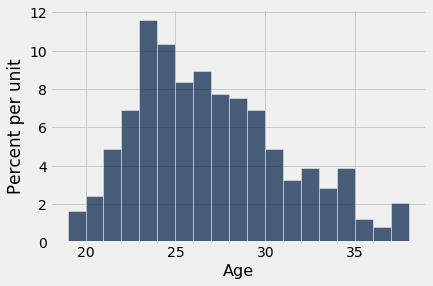

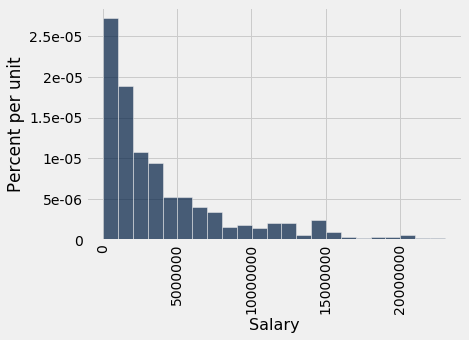

In [19]:
def histograms(t): # t is a table
    ages = t.column('Age')
    salaries = t.column('Salary')
    age_bins = np.arange(min(ages), max(ages) + 1, 1)
    salary_bins = np.arange(min(salaries),max(salaries) + 1, 1000000)
    t.hist('Age',bins = age_bins)
    t.hist('Salary',bins = salary_bins)
    
histograms(full_data)
print('Two histograms should be displayed below')

**Question 3.2**. Create a function called `compute_statistics` that takes a Table containing ages and salaries and:
- Draws a histogram of ages
- Draws a histogram of salaries
- Returns a two-element array containing the average age and average salary

You can call your `histograms` function to draw the histograms!

(37.96138211382114, 23499970.713414636)

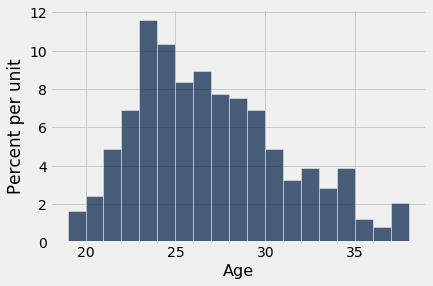

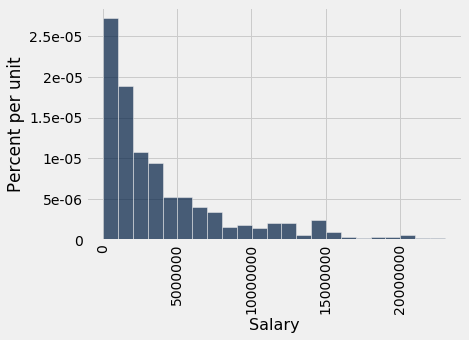

In [20]:
def compute_statistics(age_and_salary_data):
    histograms(age_and_salary_data)
    ages = age_and_salary_data.column('Age')
    salaries = age_and_salary_data.column('Salary')
    return (max(ages) - min(ages) / len(ages)) , (max(salaries) - min(salaries) / len(salaries)) 
    

full_stats = compute_statistics(full_data)
full_stats

### Convenience sampling
One sampling methodology, which is **generally a bad idea**, is to choose players who are somehow convenient to sample.  For example, you might choose players from one team that's near your house, since it's easier to survey them.  This is called, somewhat pejoratively, *convenience sampling*.

Suppose you survey only *relatively new* players with ages less than 22.  (The more experienced players didn't bother to answer your surveys about their salaries.)

**Question 3.3**  Assign `convenience_sample_data` to a subset of `full_data` that contains only the rows for players under the age of 22.

In [21]:
convenience_sample = full_data.where('Age', are.below(22))
convenience_sample

PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243
Alex Len,3649920,21,PHO,69,454,32,34,105,74,432
Andre Drummond,2568360,21,DET,82,1104,55,73,153,120,1130
Andrew Wiggins,5510640,19,MIN,82,374,170,86,50,177,1387
Anthony Bennett,5563920,21,MIN,57,216,48,27,16,36,298
Anthony Davis,5607240,21,NOP,68,696,149,100,200,95,1656
Archie Goodwin,1112280,20,PHO,41,74,44,18,9,48,231
Ben McLemore,3026280,21,SAC,82,241,140,77,19,138,996
Bradley Beal,4505280,21,WAS,63,241,194,76,18,123,962
Bruno Caboclo,1458360,19,TOR,8,2,0,0,1,4,10


**Question 3.4** Assign `convenience_stats` to a list of the average age and average salary of your convenience sample, using the `compute_statistics` function.  Since they're computed on a sample, these are called *sample averages*. 

(20.568181818181817, 5595709.636363637)

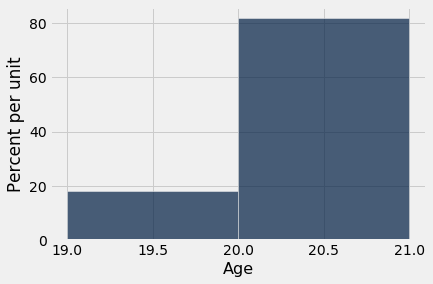

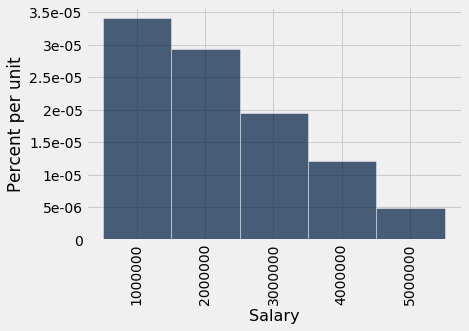

In [22]:
convenience_stats = compute_statistics(convenience_sample)
convenience_stats

Next, we'll compare the convenience sample salaries with the full data salaries in a single histogram. To do that, we'll need to use the `bin_column` option of the `hist` method, which indicates that all columns are counts of the bins in a particular column. The following cell should not require any changes; just run it.

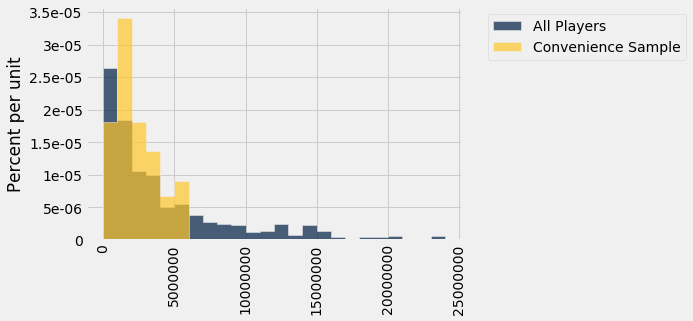

In [23]:
def compare_salaries(first, second, first_title, second_title):
    """Compare the salaries in two tables."""
    max_salary = max(np.append(first.column('Salary'), second.column('Salary')))
    bins = np.arange(0, max_salary+1e6+1, 1e6)
    first_binned = first.bin('Salary', bins=bins).relabeled(1, first_title)
    second_binned = second.bin('Salary', bins=bins).relabeled(1, second_title)
    first_binned.join('bin', second_binned).hist(bin_column='bin')

compare_salaries(full_data, convenience_sample, 'All Players', 'Convenience Sample')

**Question 3.5** Does the convenience sample give us an accurate picture of the age and salary of the full population of NBA players in 2014-2015?  Would you expect it to, in general?  Before you move on, write a short answer in English below.  You can refer to the statistics calculated above or perform your own analysis.

In this case no to both questions. Well second one it depends on how the data is sampled, i.e random samples or specific range samples like in this example. if random i believe it would give a fairly reasonable result but when it selective it to skewed to make reasonable deductions of overall population.

### Simple random sampling
A more principled approach is to sample uniformly at random from the players.  If we ensure that each player is selected at most once, this is a *simple random sample without replacement*, sometimes abbreviated to "simple random sample" or "SRSWOR".  Imagine writing down each player's name on a card, putting the cards in an urn, and shuffling the urn.  Then, pull out cards one by one and set them aside, stopping when the specified *sample size* is reached.

We've produced two samples of the `salary_data` table in this way: `small_srswor_salary.csv` and `large_srswor_salary.csv` contain, respectively, a sample of size 44 (the same as the convenience sample) and a larger sample of size 100.  

The `load_data` function below loads a salary table and joins it with `player_data`.

In [24]:
def load_data(salary_file):
    return player_data.join('Name', Table.read_table(salary_file), 'PlayerName')

**Question 3.6** Run the same analyses on the small and large samples that you previously ran on the full dataset and on the convenience sample.  Which is more accurate, the estimate of population statistics that we get from the convenience sample, the estimate from the small simple random sample, or the estimate from the large simple random sample?  

Full data stats:                  (37.96138211382114, 23499970.713414636)
Convenience data stats:           (20.568181818181817, 5595709.636363637)
Small simple random sample stats: (36.52272727272727, 20643308.454545453)
Large simple random sample stats: (37.81, 23410638.0)


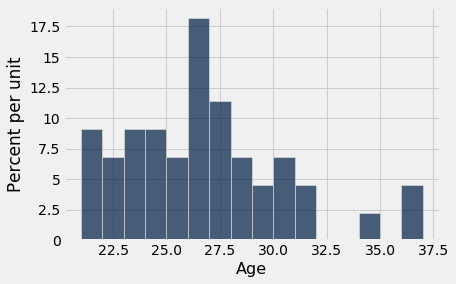

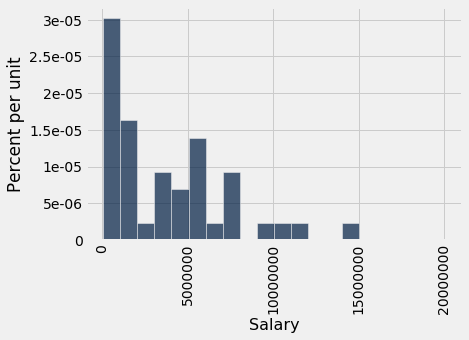

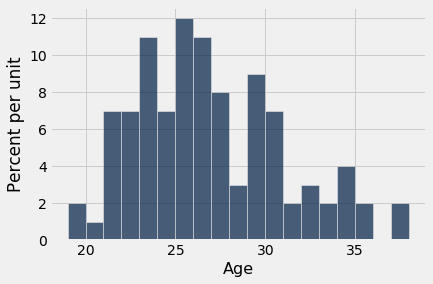

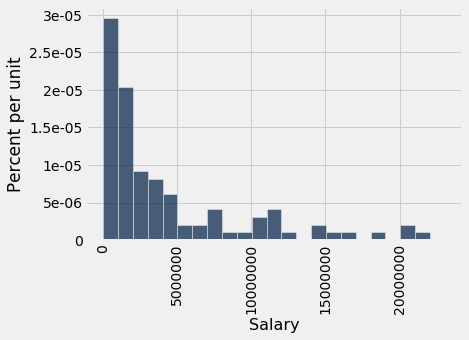

In [26]:
small_srswor_data = load_data("small_srswor_salary.csv")
small_stats = compute_statistics(small_srswor_data)
large_srswor_data = load_data("large_srswor_salary.csv")
large_stats = compute_statistics(large_srswor_data)
print('Full data stats:                 ', full_stats)
print('Convenience data stats:          ', convenience_stats)
print('Small simple random sample stats:', small_stats)
print('Large simple random sample stats:', large_stats)

**Comparison**: Large sample random is the most inline with full data, followed small and last convenience.

### Producing simple random samples
Often it's useful to take random samples even when we have a larger dataset available. Another use of taking random samples is to help us understand how inaccurate other samples are.

Tables provide the method `sample()` for producing random samples.  Note that its default is to sample with replacement. To see how to call `sample()`, search the documentation on the [datascience documentation](http://data8.org/datascience/) of the course website, or enter `full_data.sample?` into a code cell and press Shift + Enter.

**Question 3.7** Produce a simple random sample of size 44 from `full_data`.  (You don't need to bother with a join this time -- just use `full_data.sample(...)` directly.   That will have the same result as sampling from `salary_data` and joining with `player_data`.)  Call the sample table `my_small_srswor_data`. Run your analysis on it again.  
- Are your results roughly similar to those in the small sample we provided you?  

(33.56818181818182, 23409566.363636363)

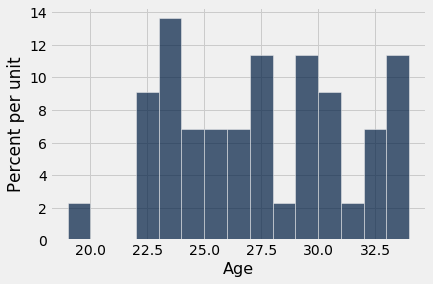

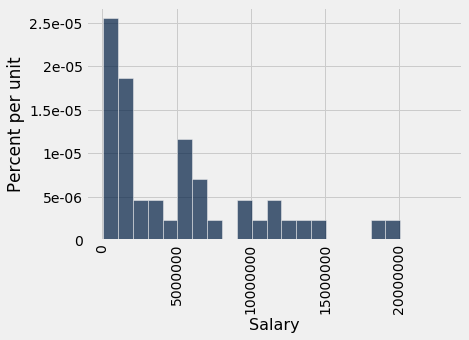

In [30]:
my_small_srswor_data = full_data.sample(k = 44)
compute_statistics(my_small_srswor_data)

**ANSWER**: Looks kind of skewed compared to previous small

**Question 3.8** Run your code several 50 times to get new samples.  
- How much does the average age change across samples? 
- What about average salary?

E:\Anaconda\lib\site-packages\datascience\tables.py:2689: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, axes = plt.subplots(n, 1, figsize=(width, height * n))


Spread of ages:  2.0113636363636367
Spread of salaries  5952071.613636363


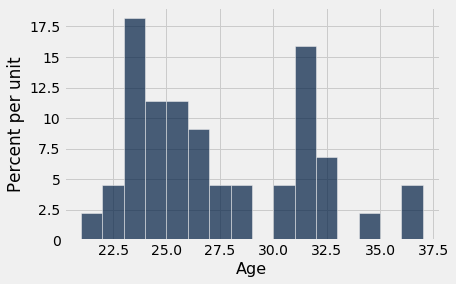

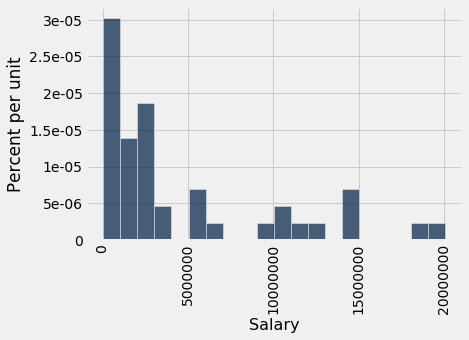

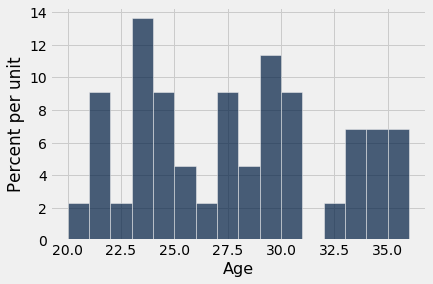

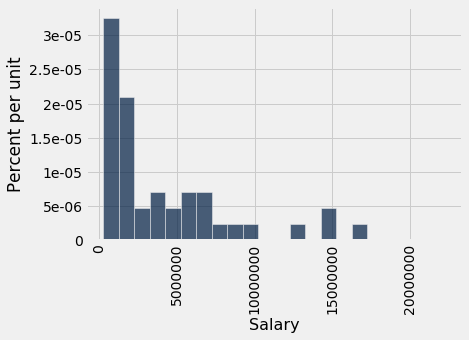

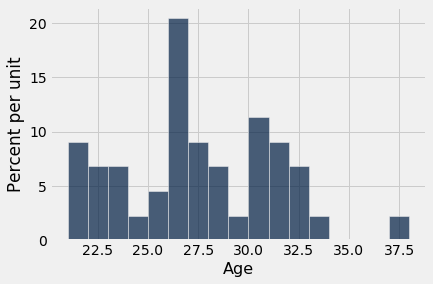

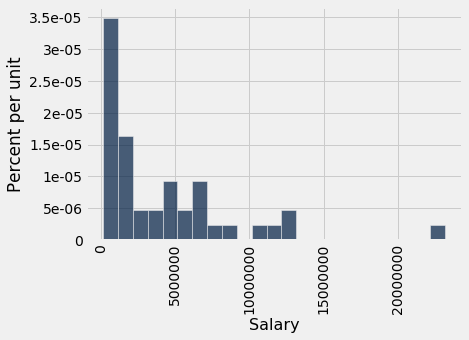

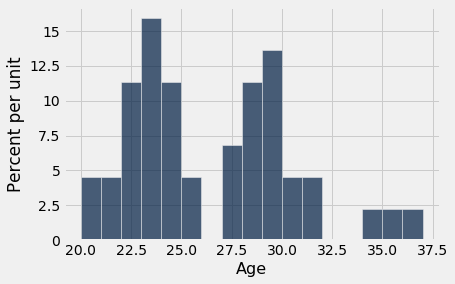

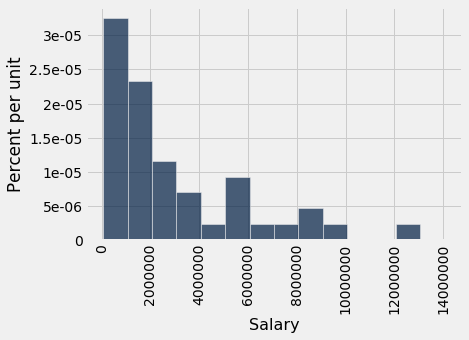

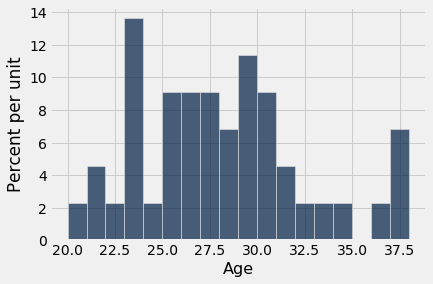

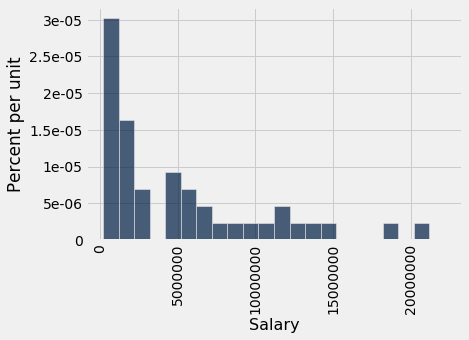

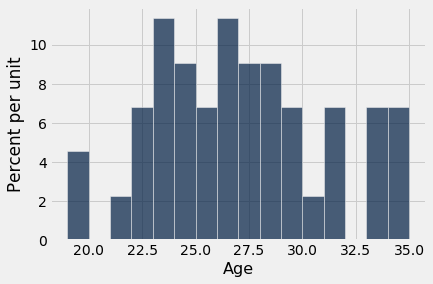

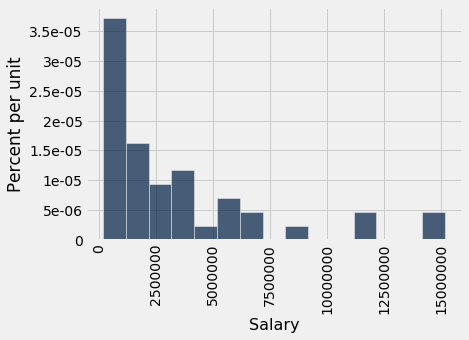

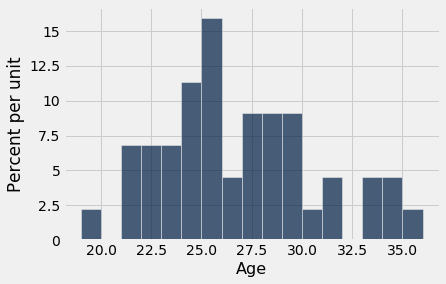

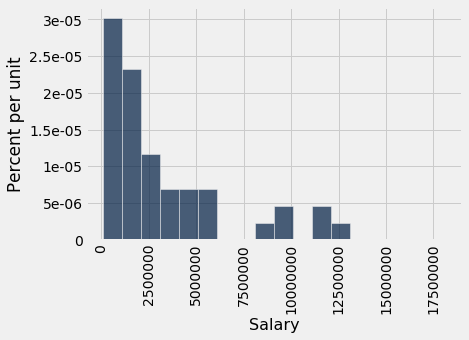

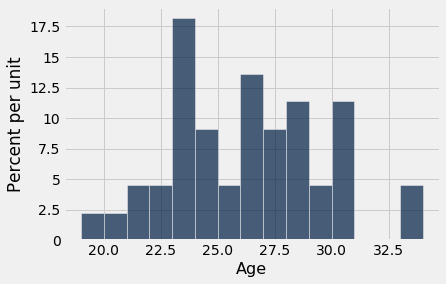

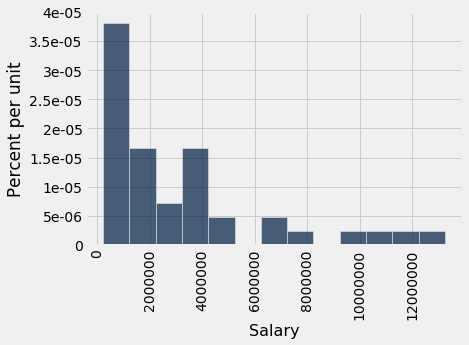

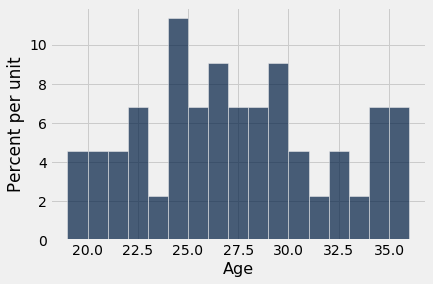

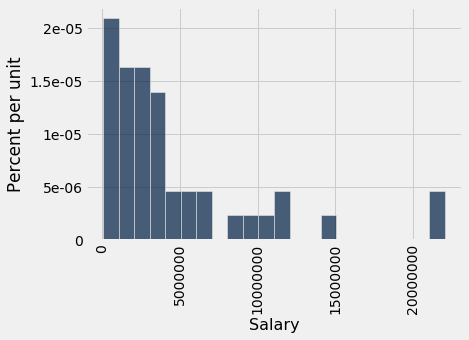

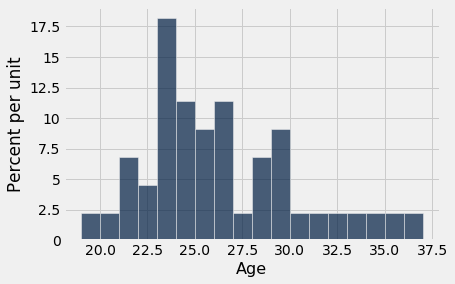

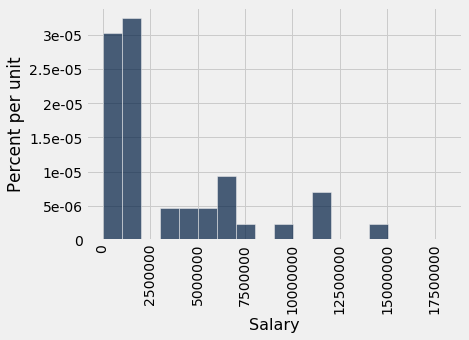

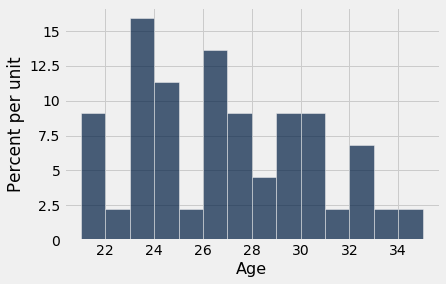

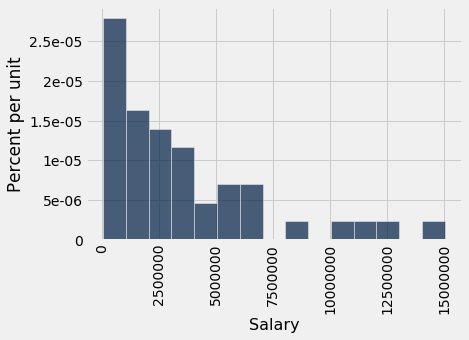

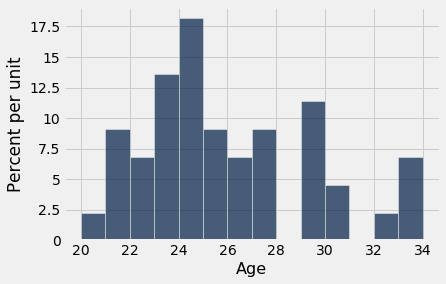

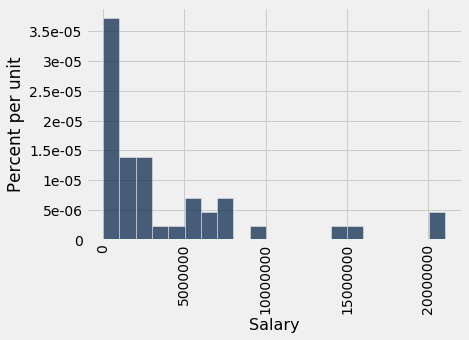

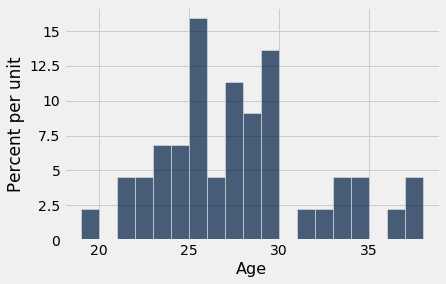

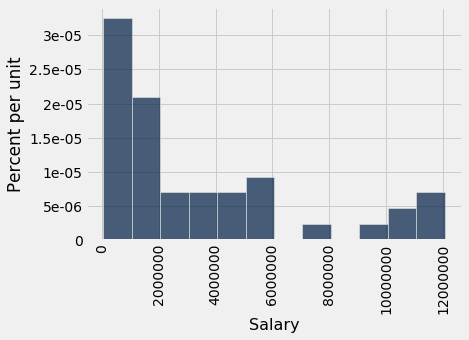

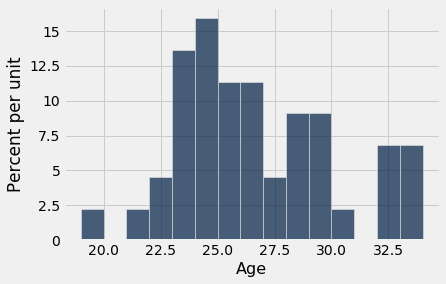

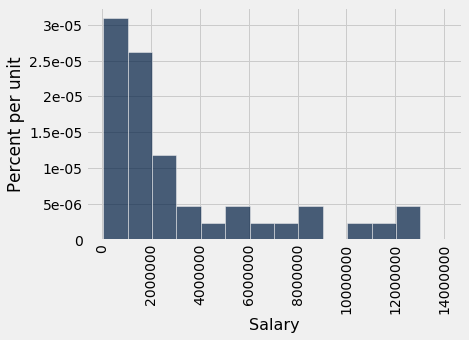

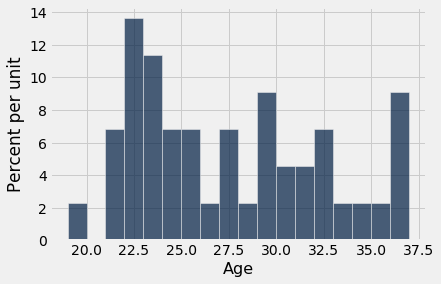

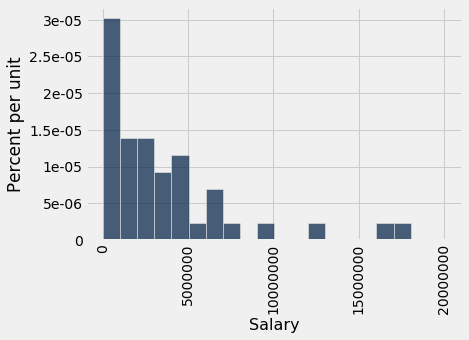

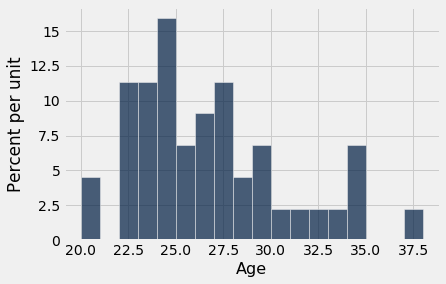

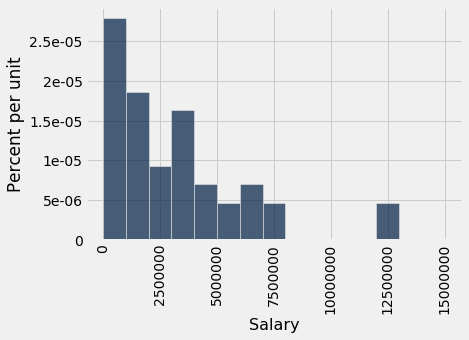

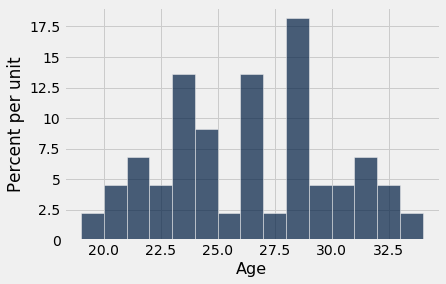

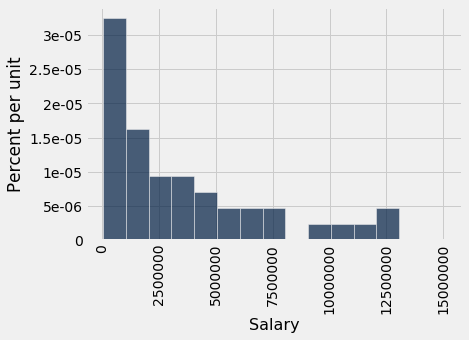

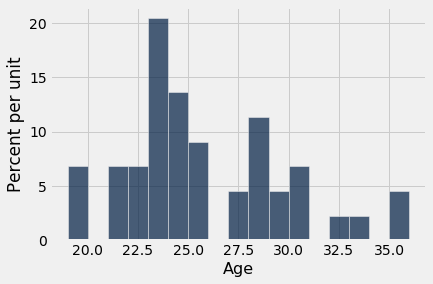

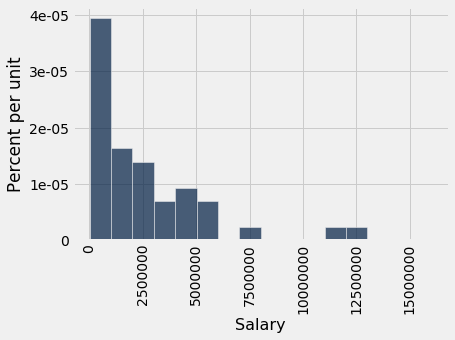

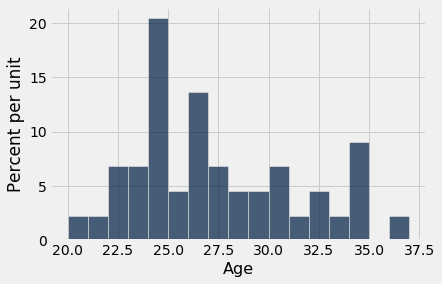

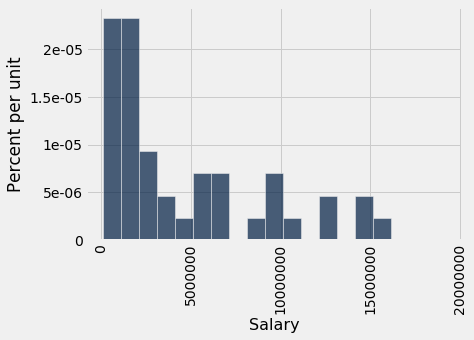

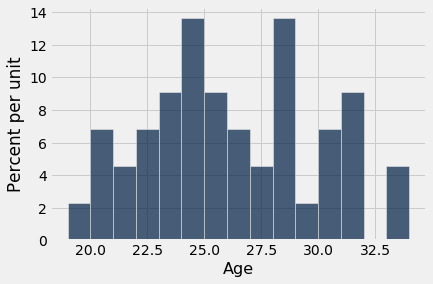

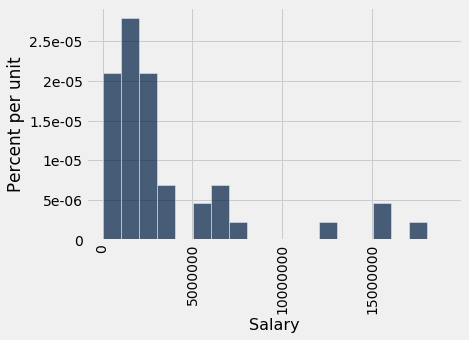

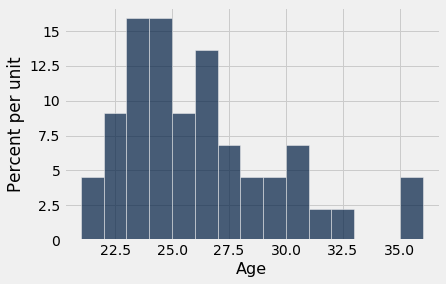

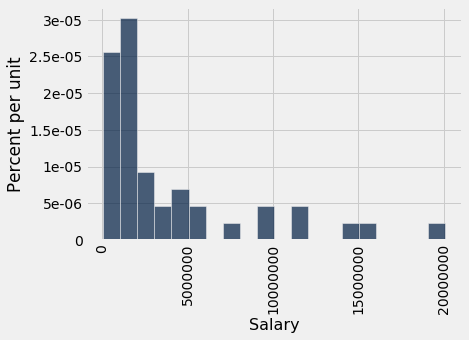

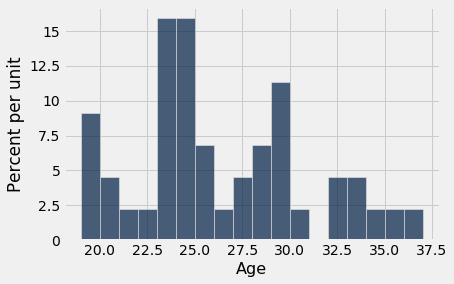

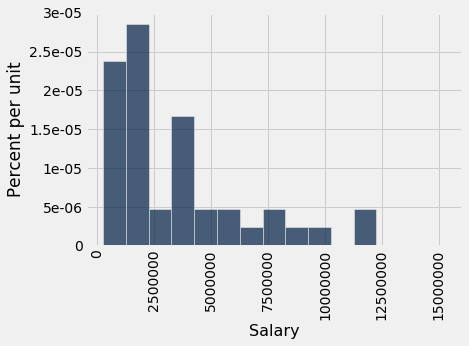

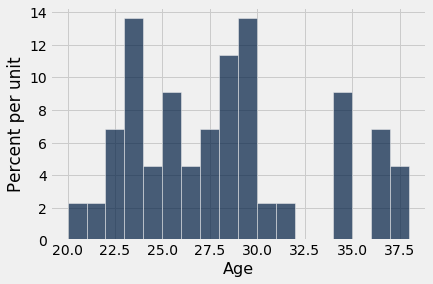

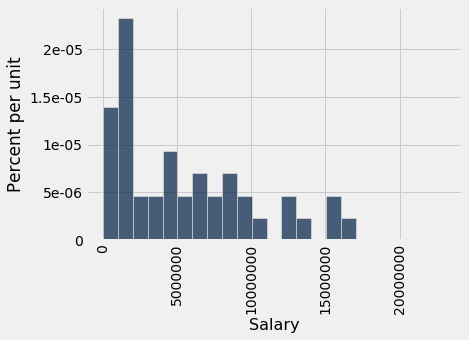

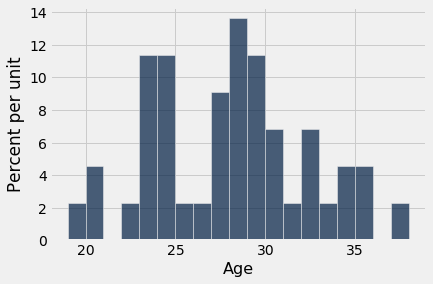

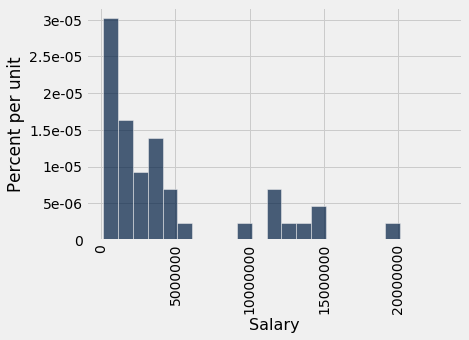

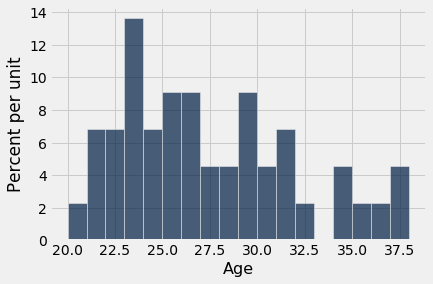

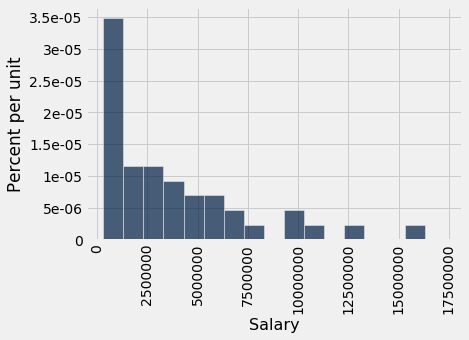

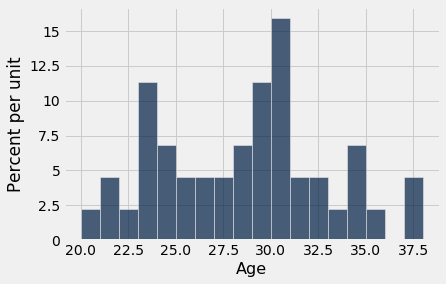

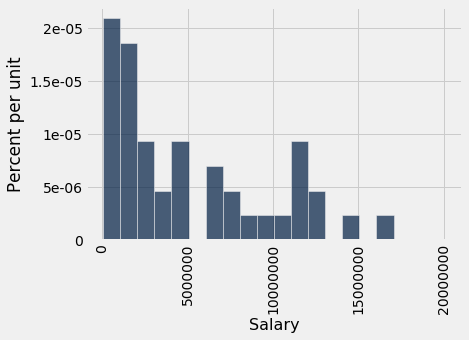

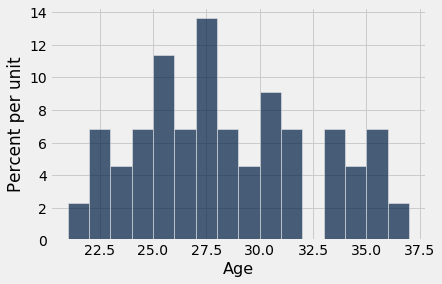

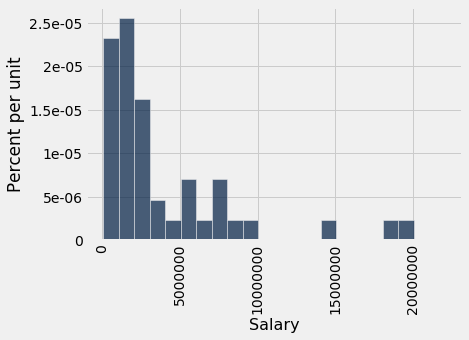

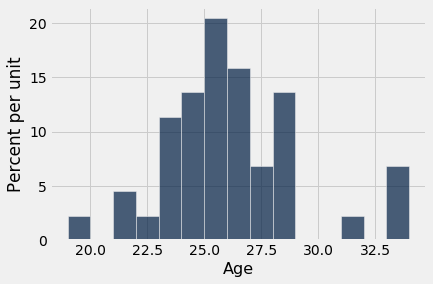

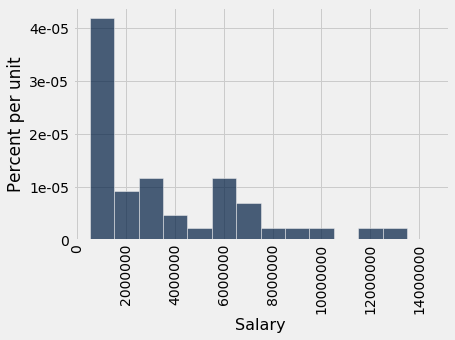

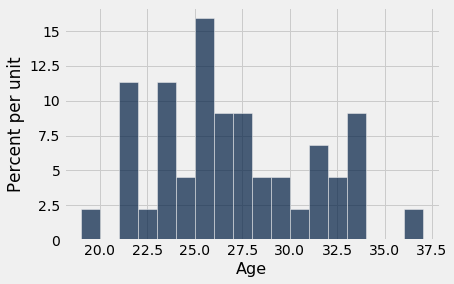

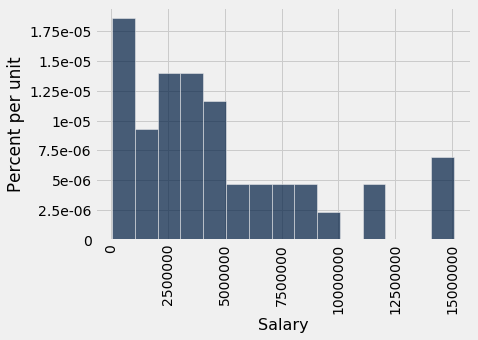

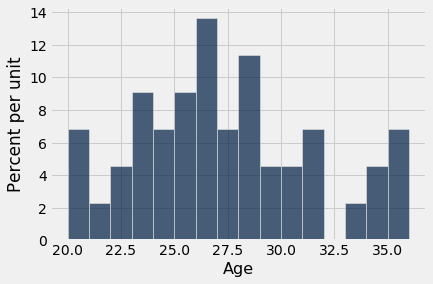

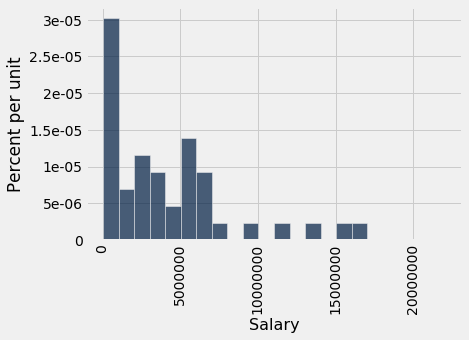

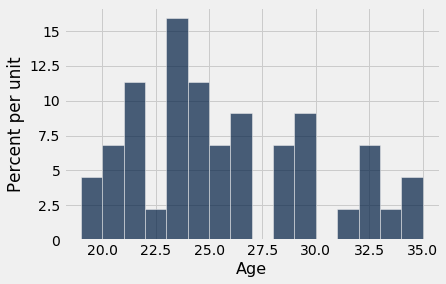

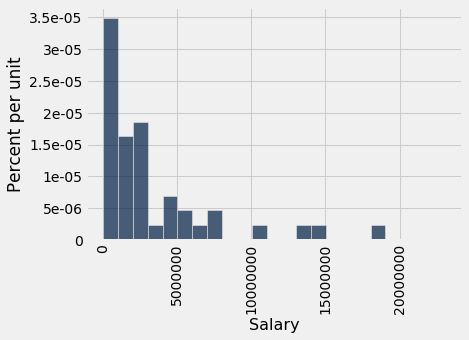

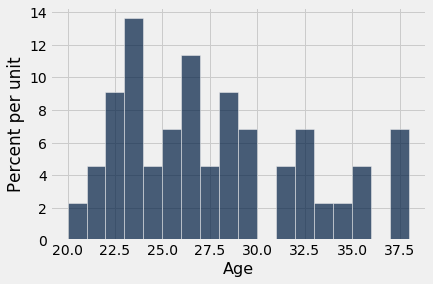

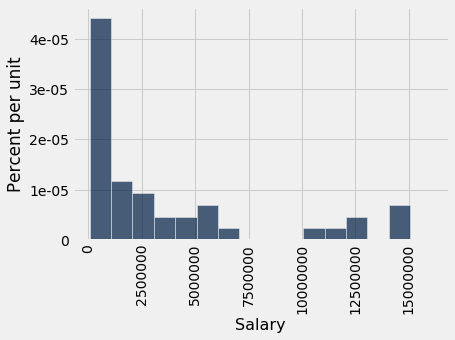

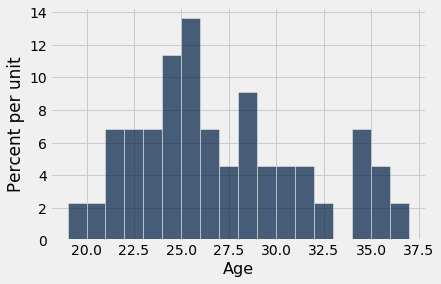

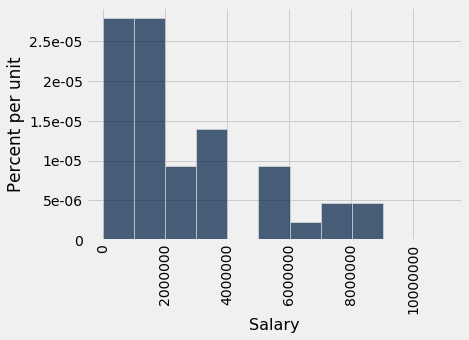

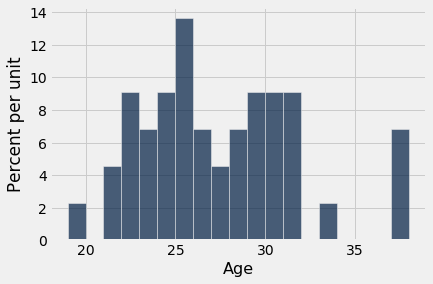

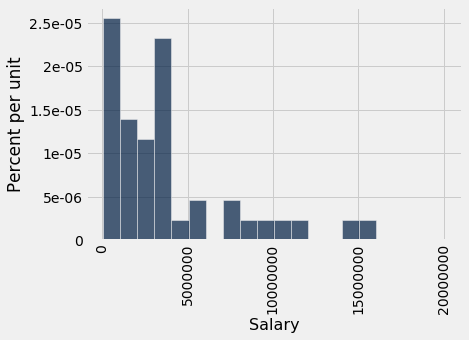

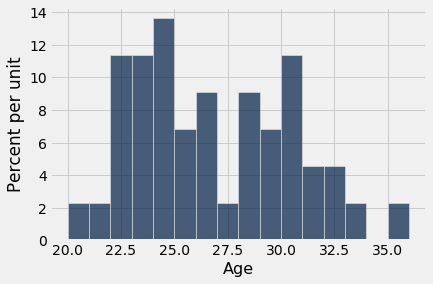

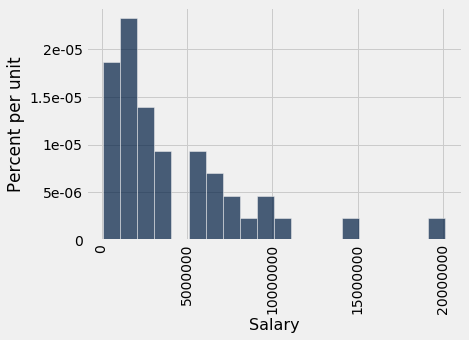

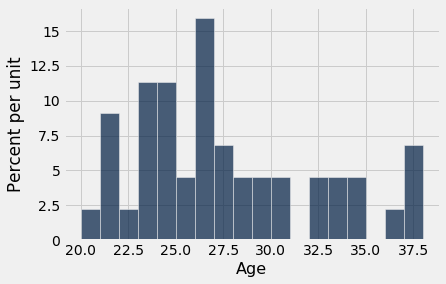

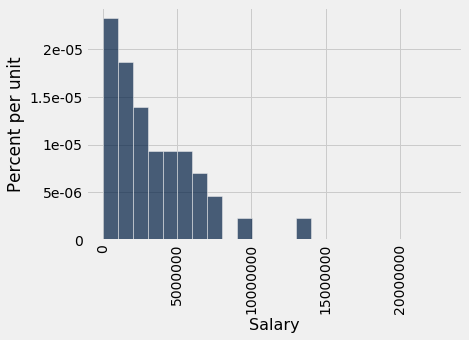

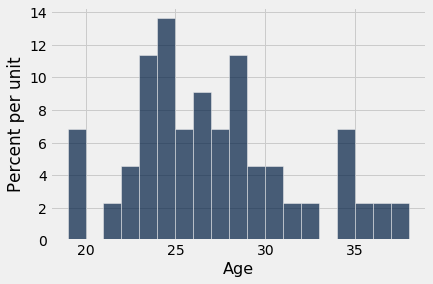

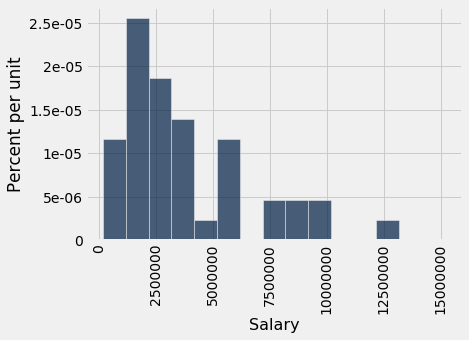

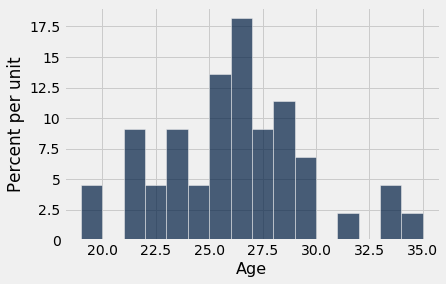

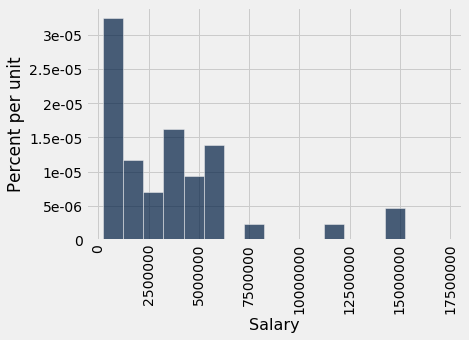

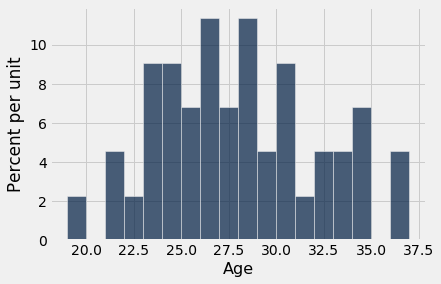

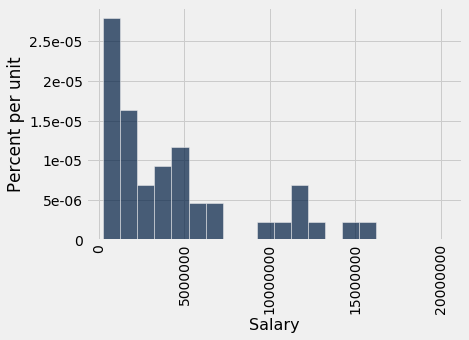

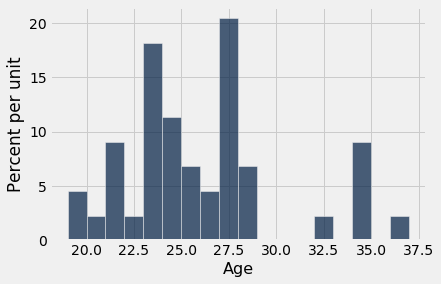

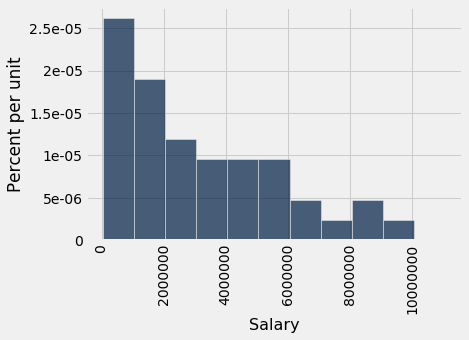

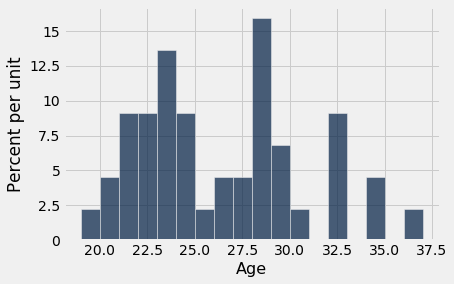

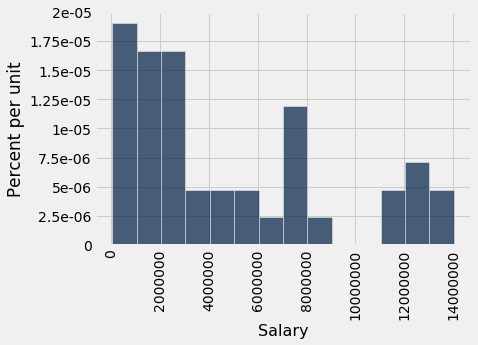

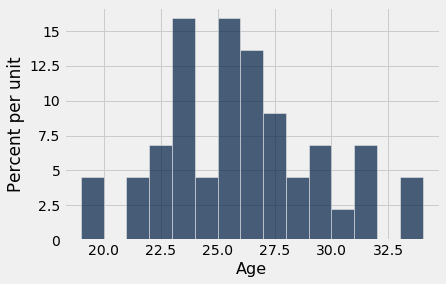

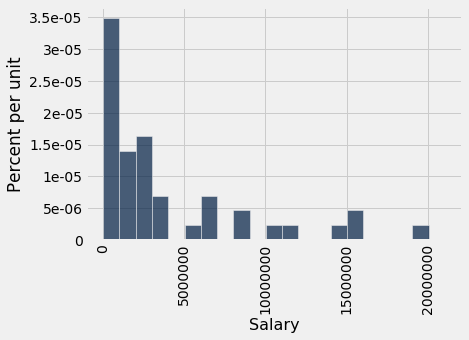

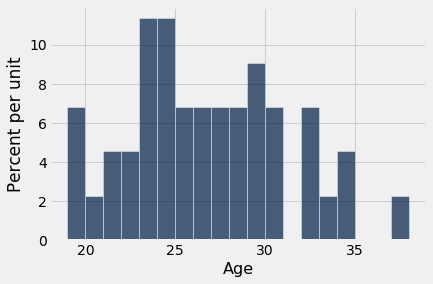

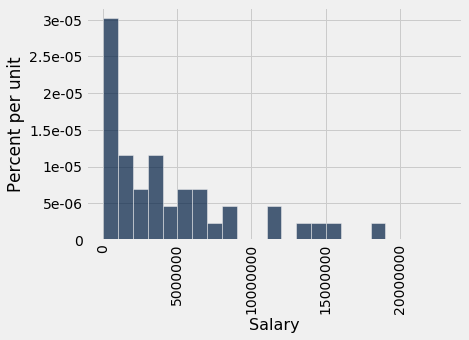

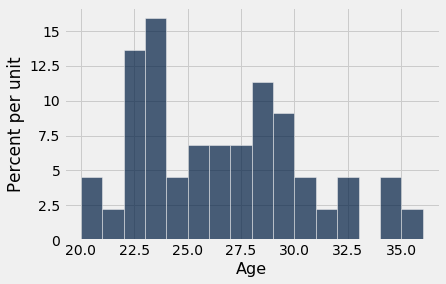

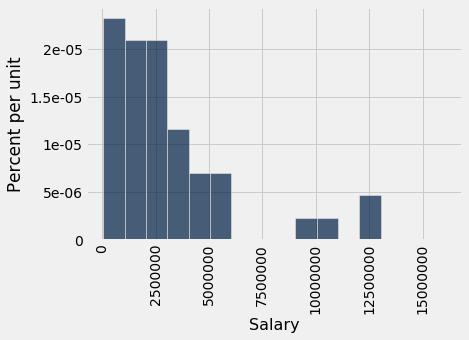

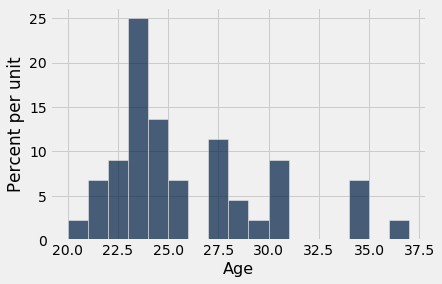

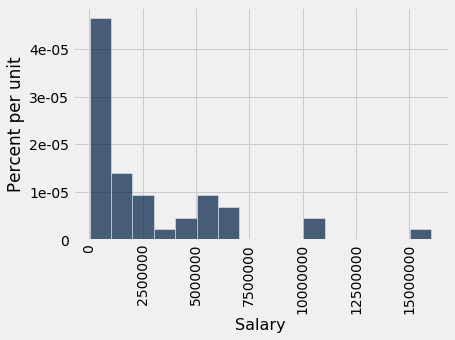

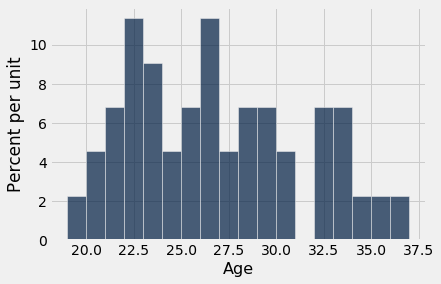

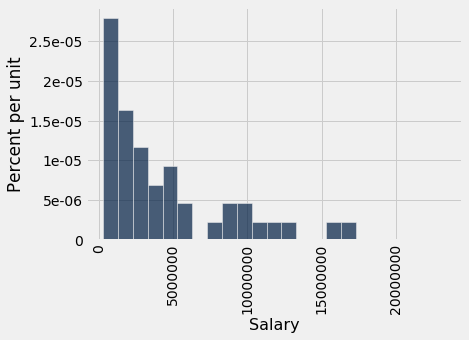

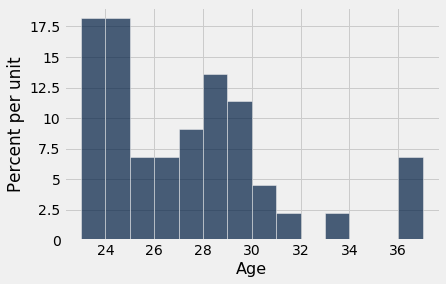

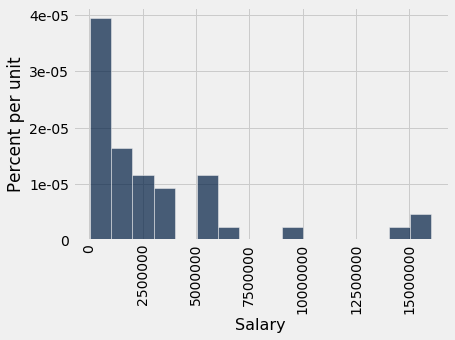

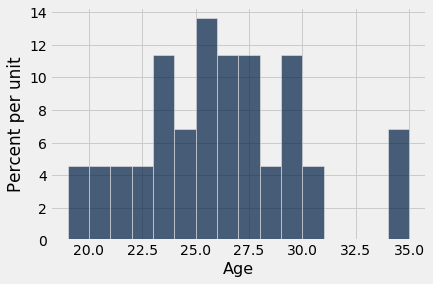

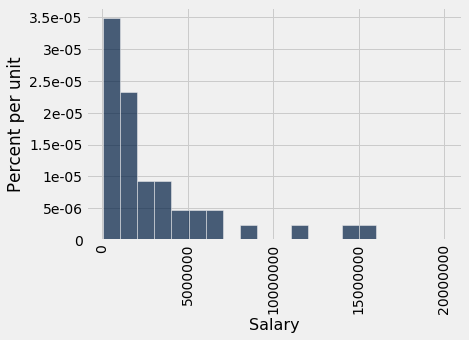

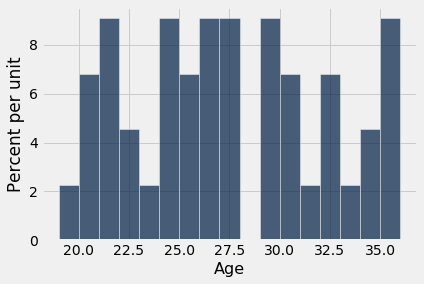

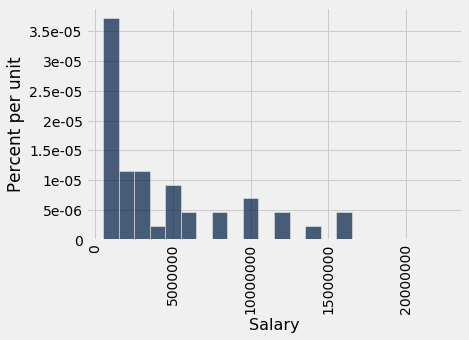

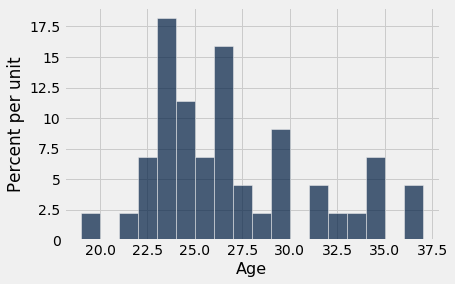

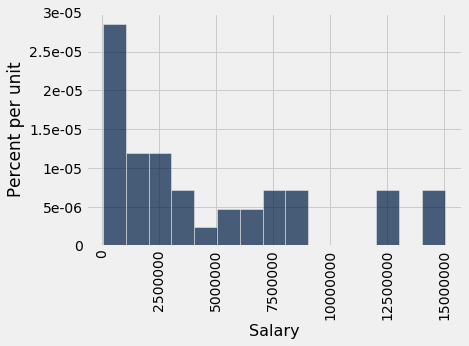

In [31]:
age_avgs = []
salary_avgs = []
for i in range(50):
    my_small_srswor_data = full_data.sample(k = 44)
    my_small_stats = compute_statistics(my_small_srswor_data)
    age_avgs.append(my_small_stats[0])
    salary_avgs.append(my_small_stats[1])
print('Spread of ages: ',(max(age_avgs)-min(age_avgs))/2)
print('Spread of salaries ',(max(salary_avgs)-min(salary_avgs))/2)


**ANSWER**: avaerage age changes by about 2 years with average salary changes of 5.9 million

**Question 3.9** As in the previous question, analyze 50 simple random samples of size 100 from `full_data`.  
- Do the histogram statistics seem to change more or less across samples of 100 than across samples of size 44?  
- Are the sample averages and histograms closer to their true values for age or for salary?  What did you expect to see?

Spread of ages:  4.010000000000005
Spread of salaries  8754000.0


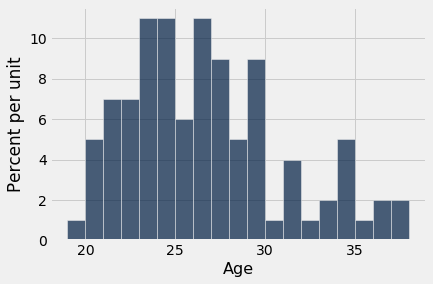

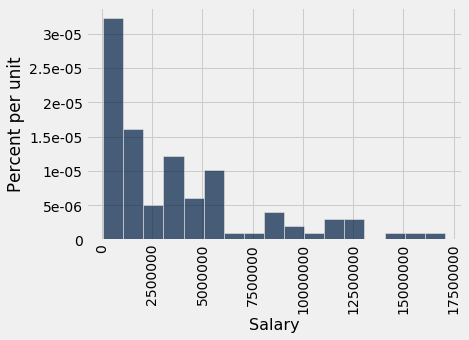

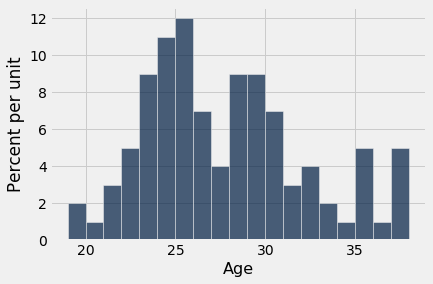

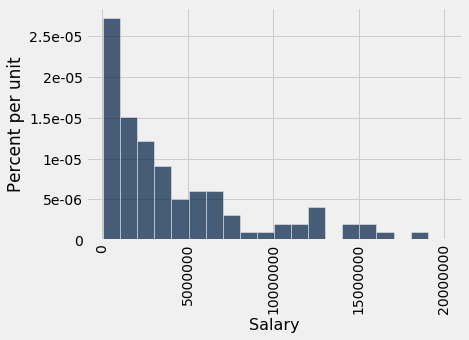

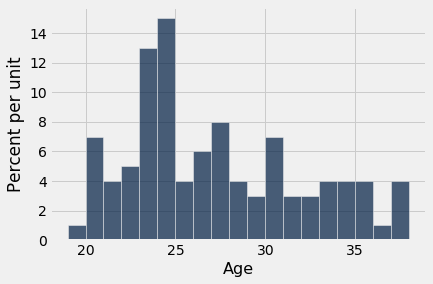

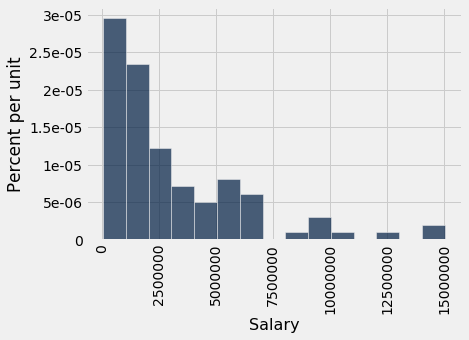

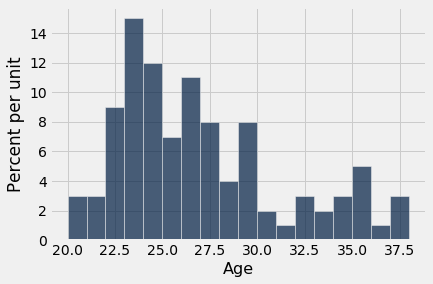

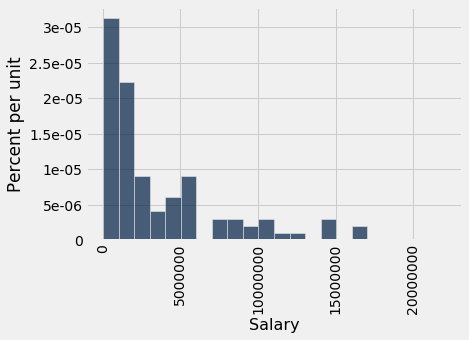

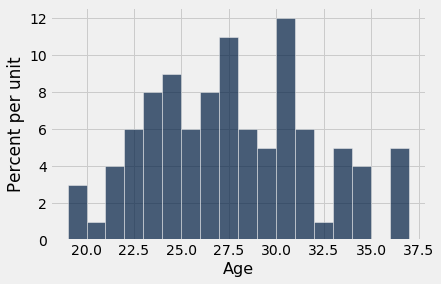

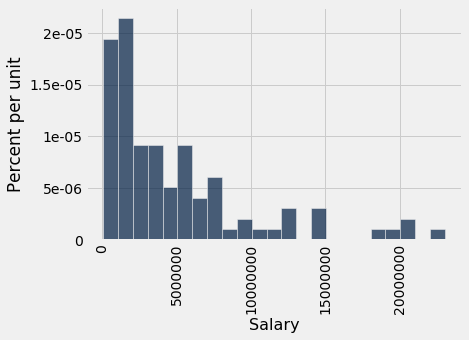

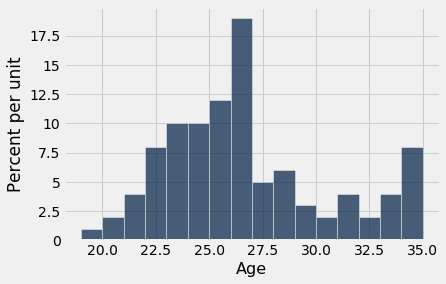

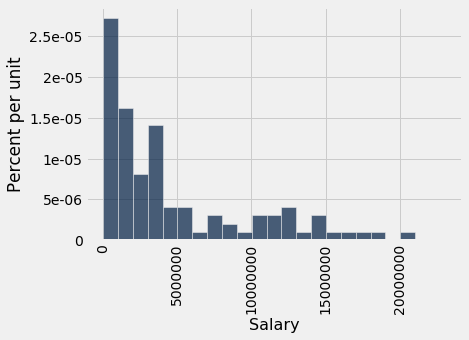

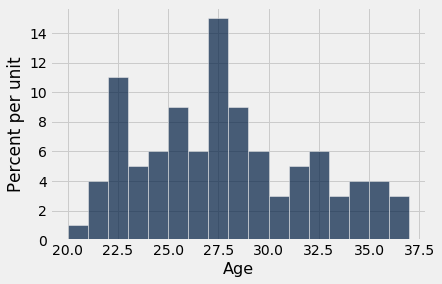

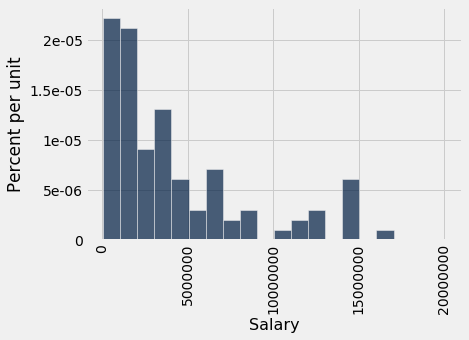

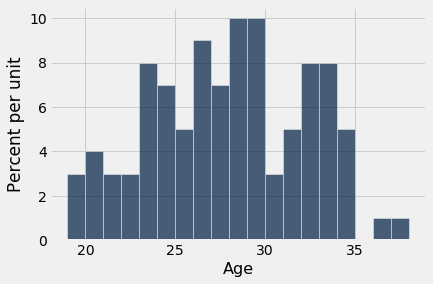

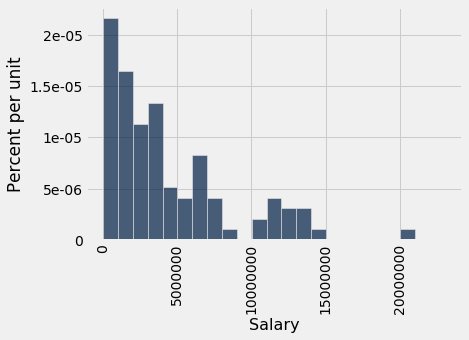

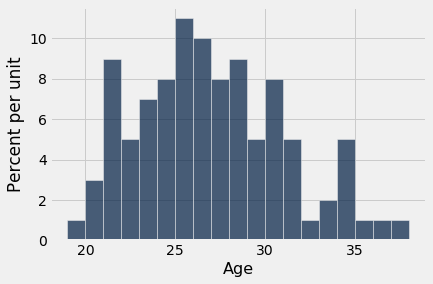

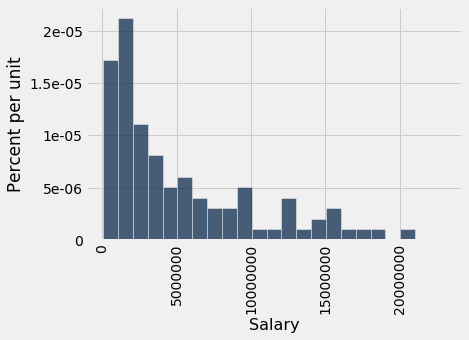

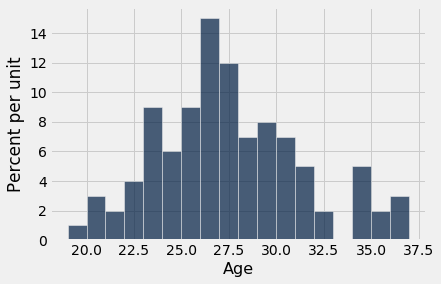

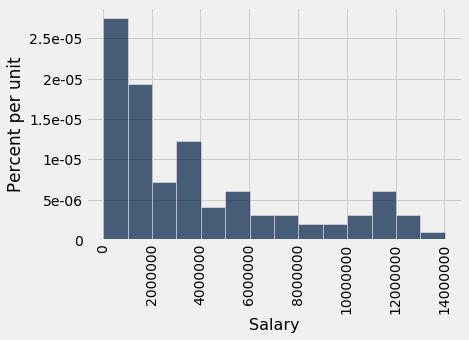

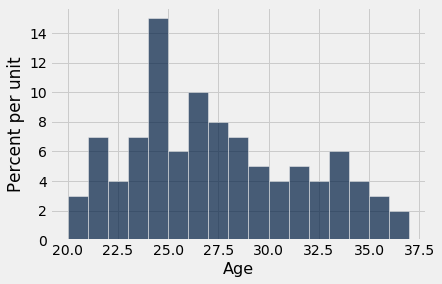

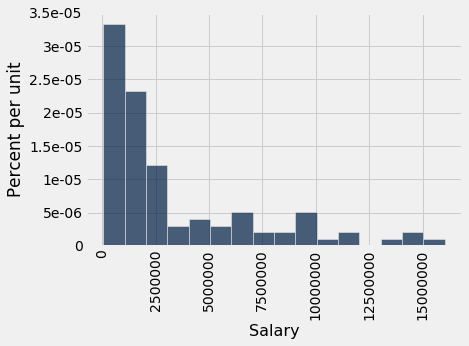

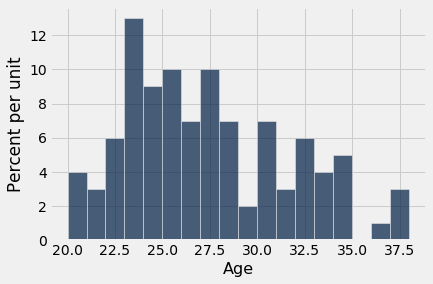

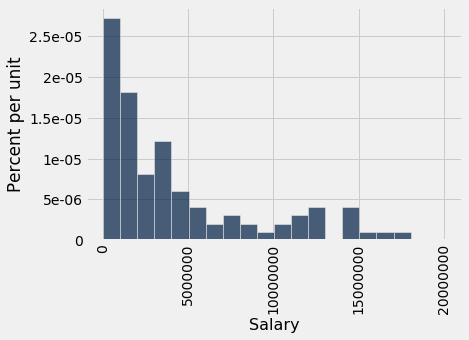

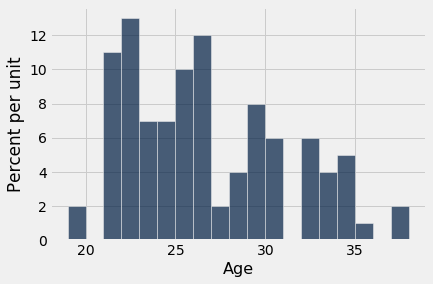

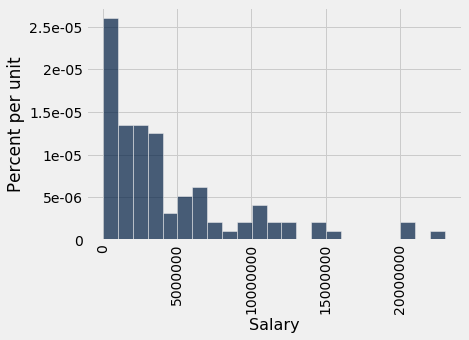

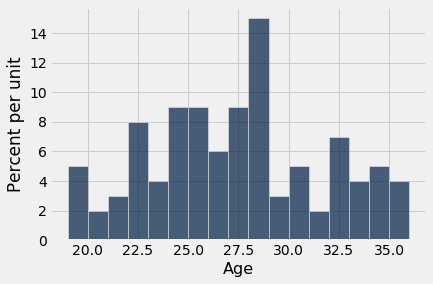

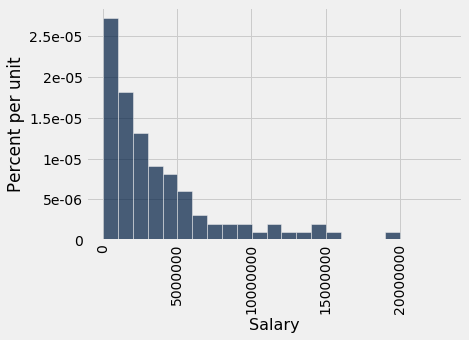

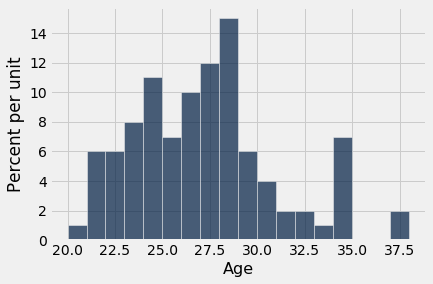

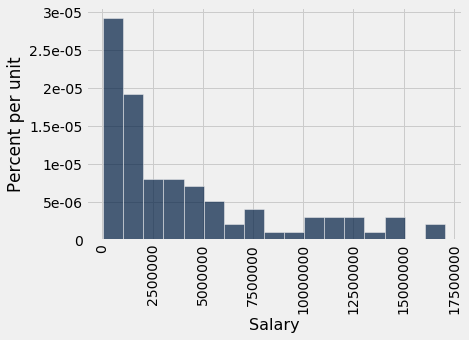

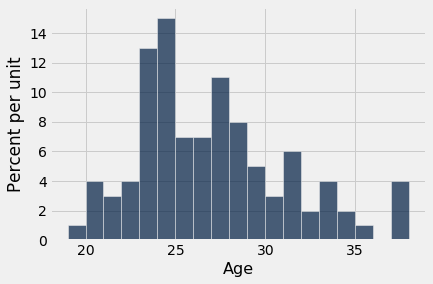

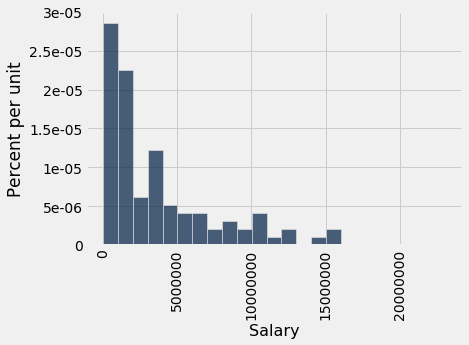

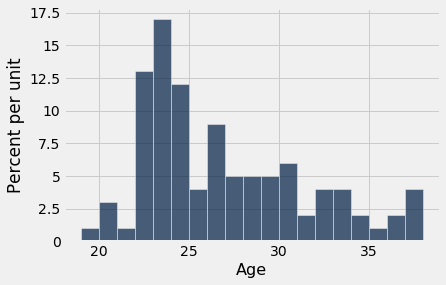

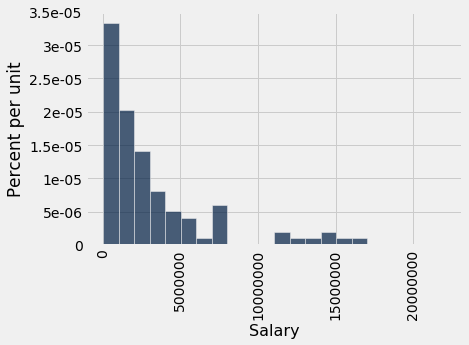

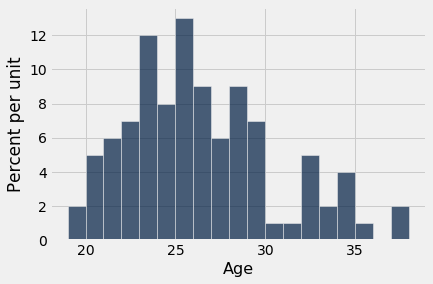

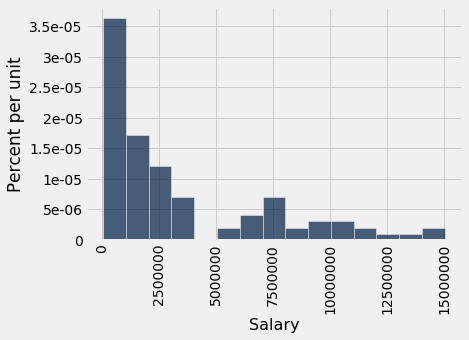

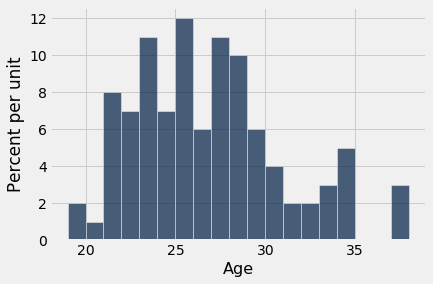

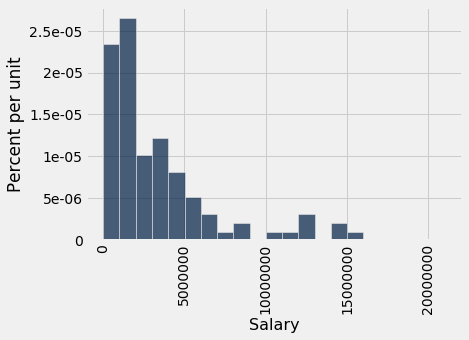

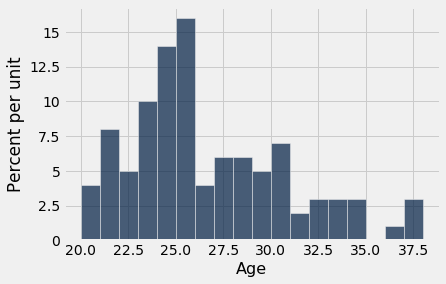

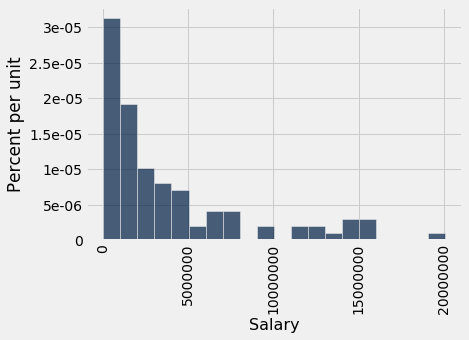

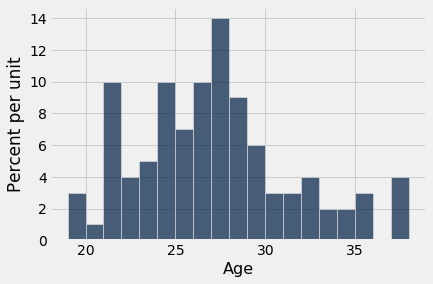

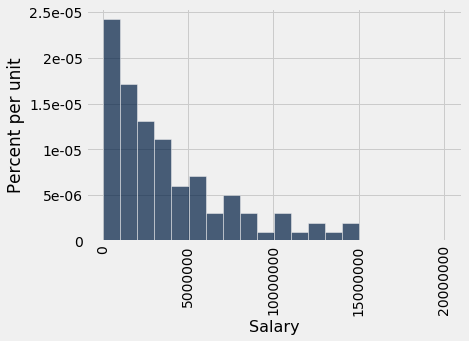

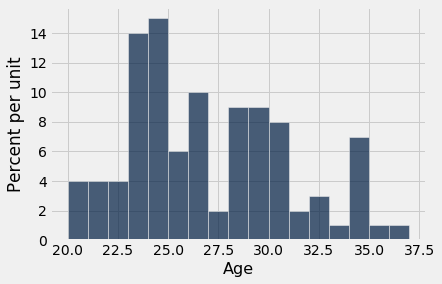

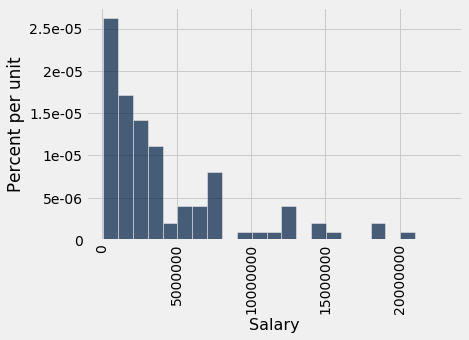

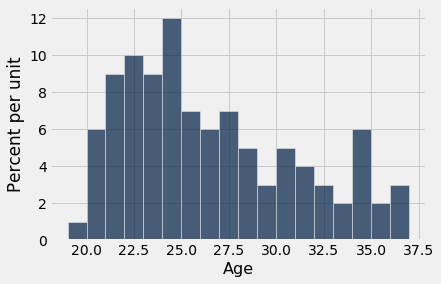

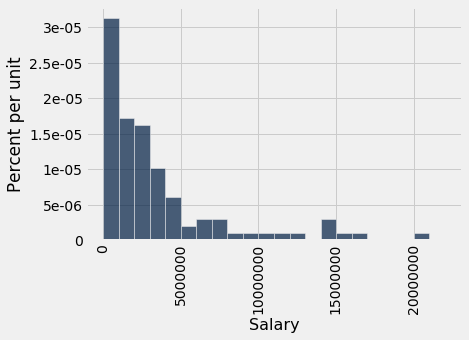

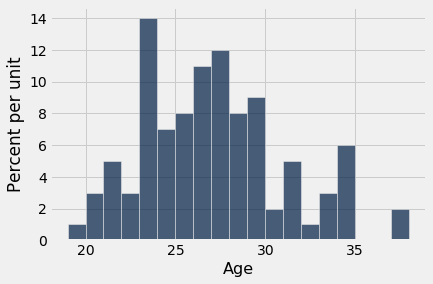

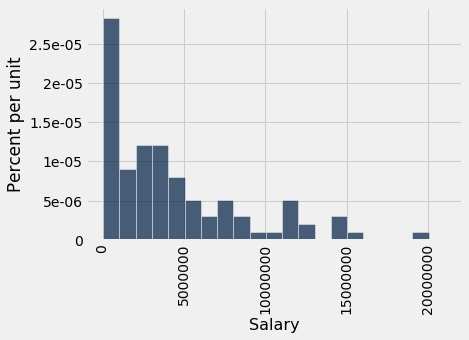

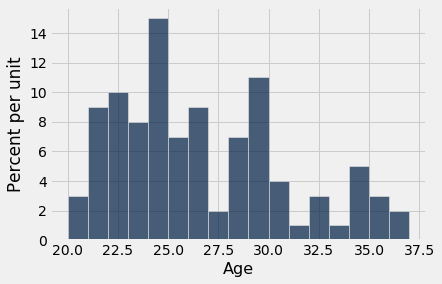

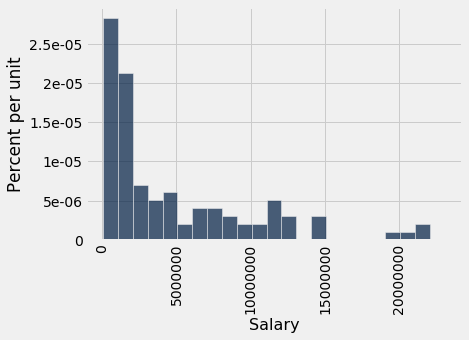

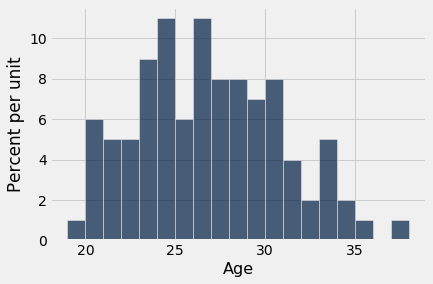

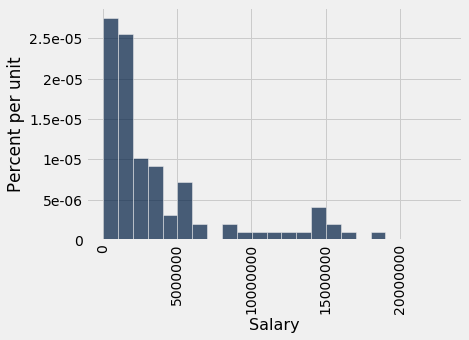

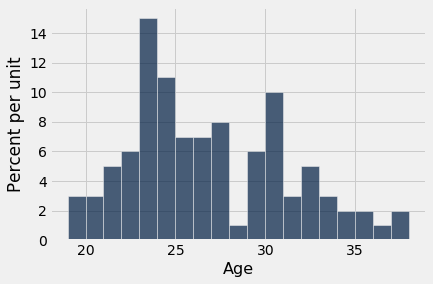

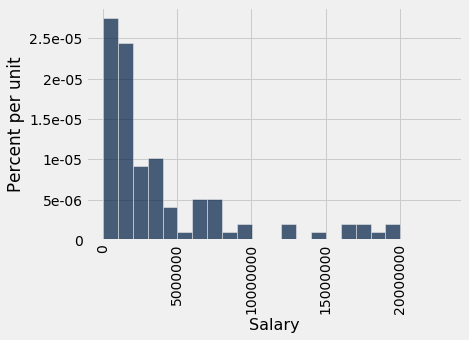

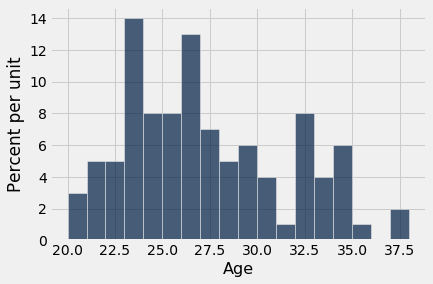

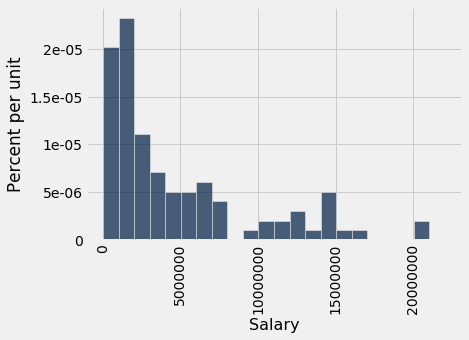

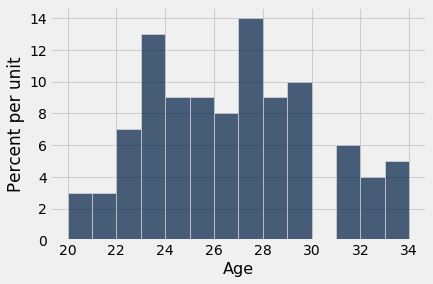

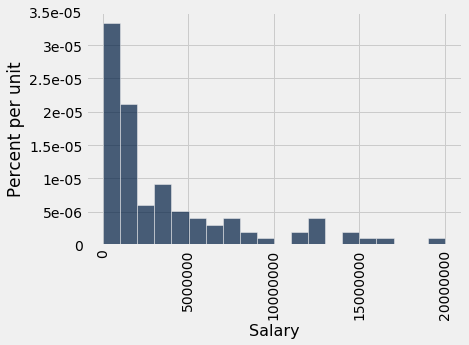

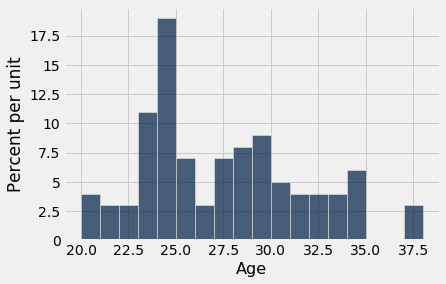

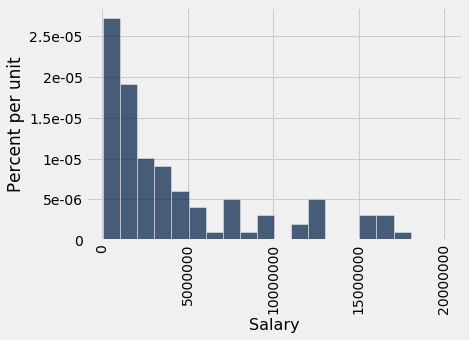

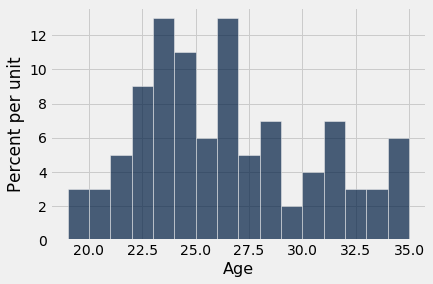

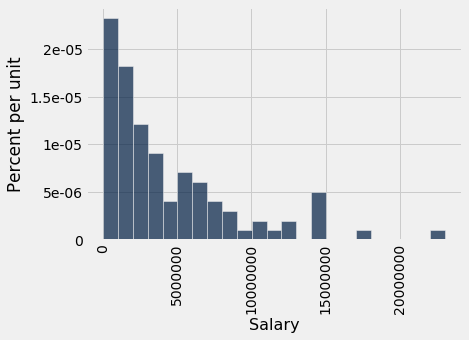

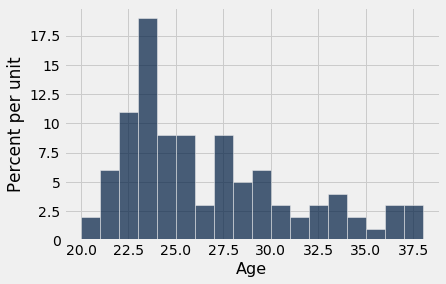

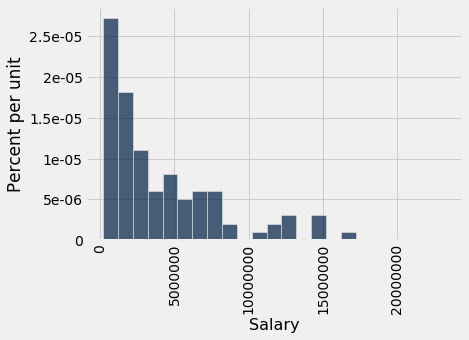

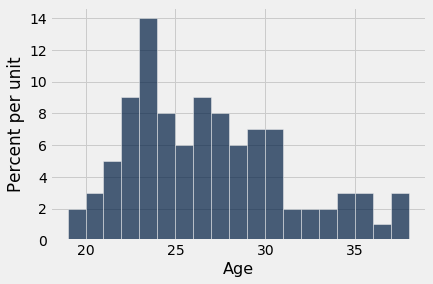

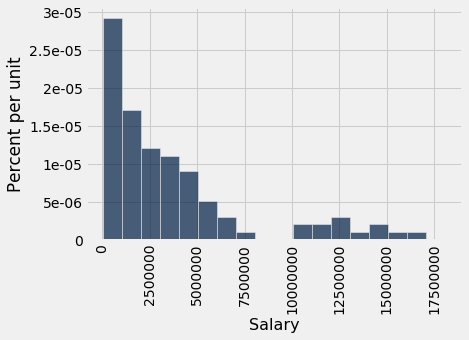

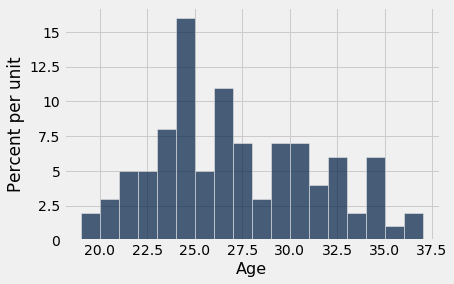

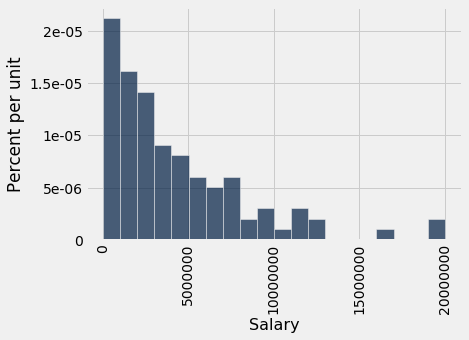

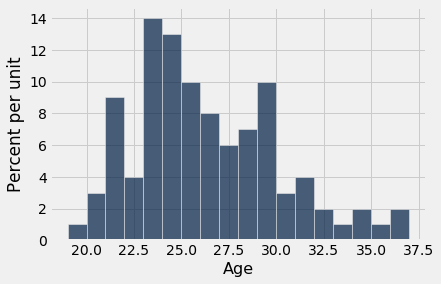

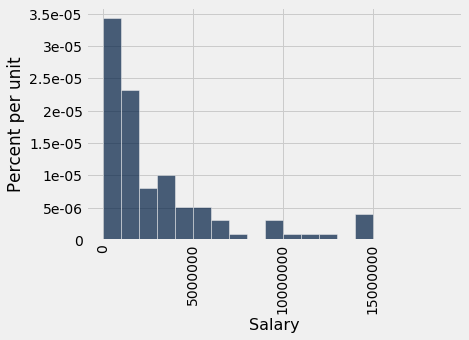

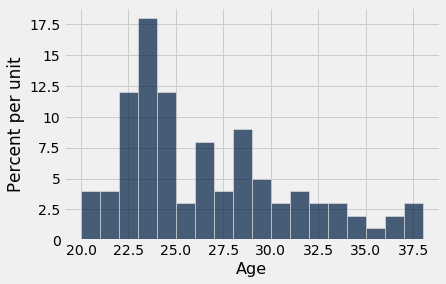

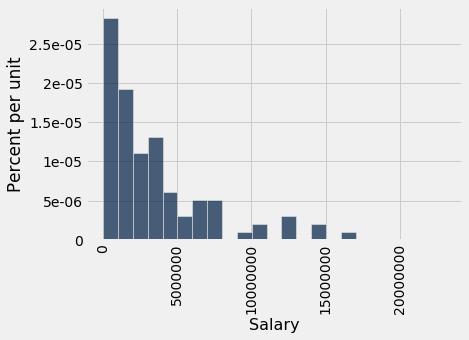

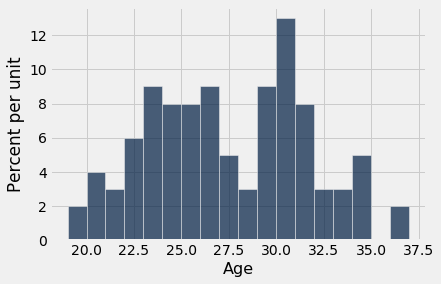

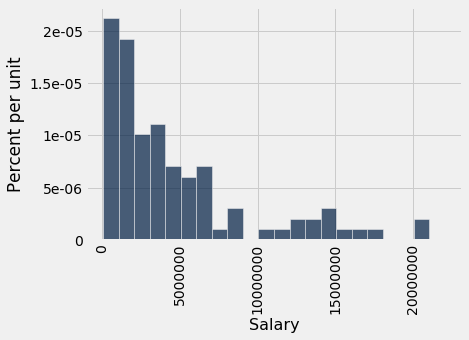

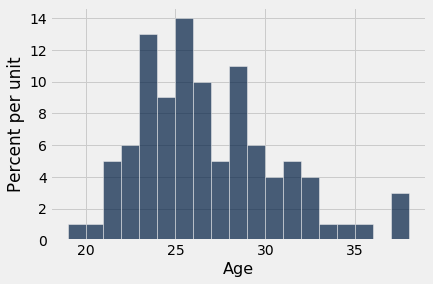

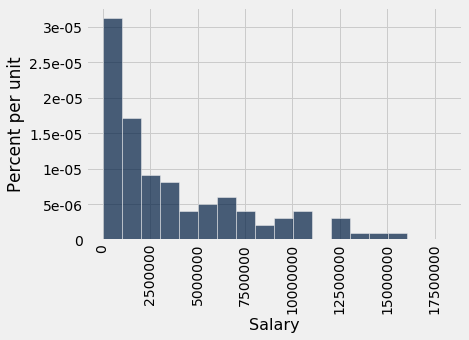

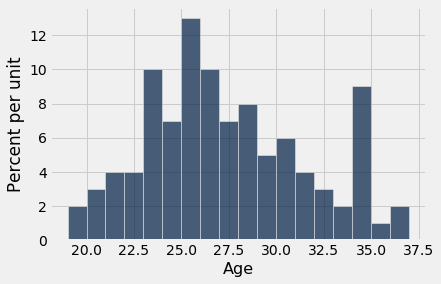

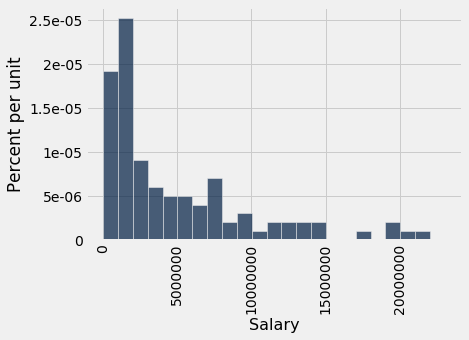

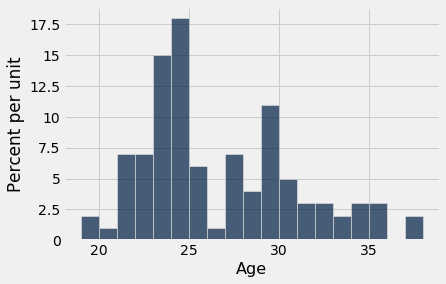

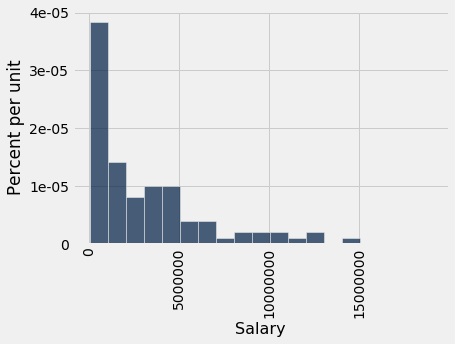

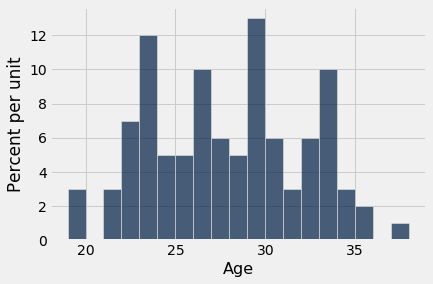

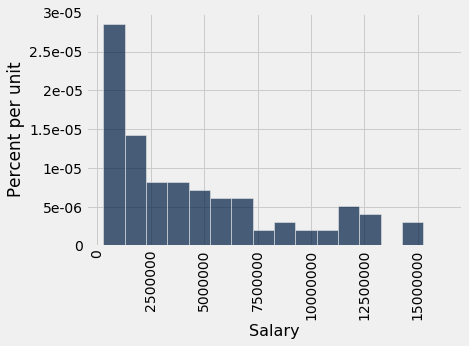

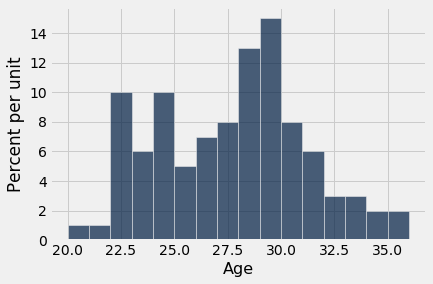

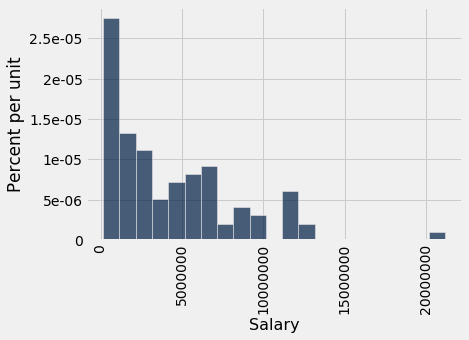

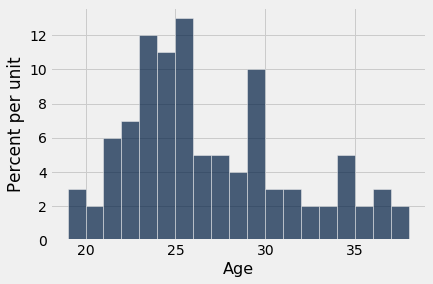

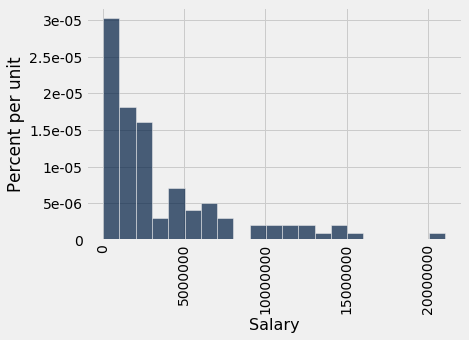

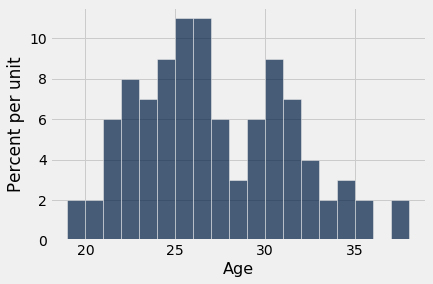

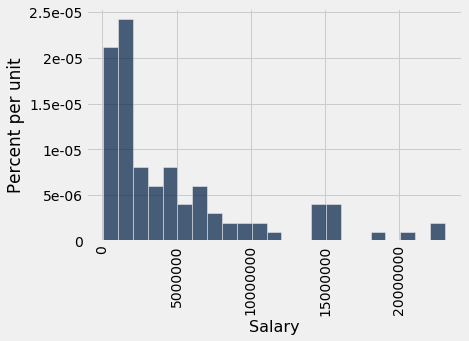

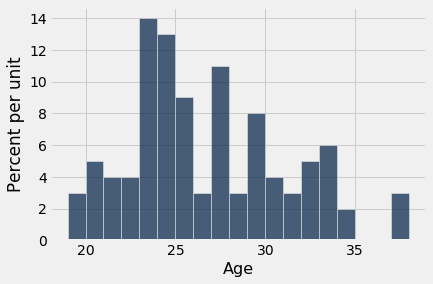

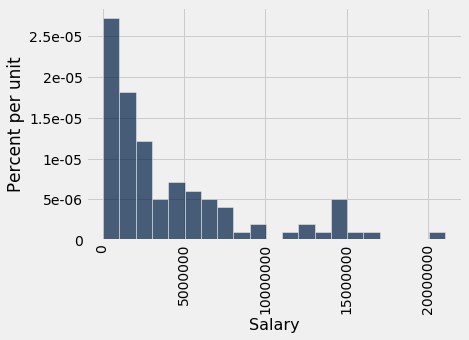

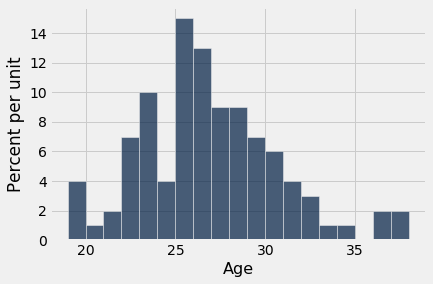

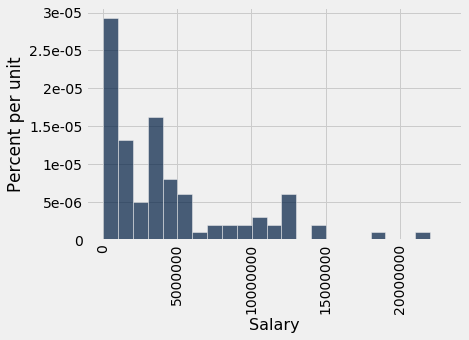

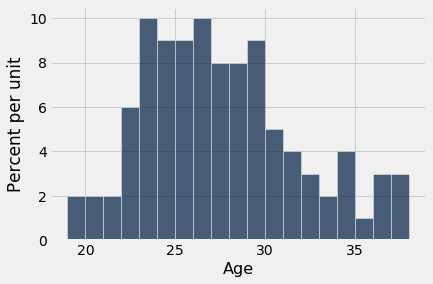

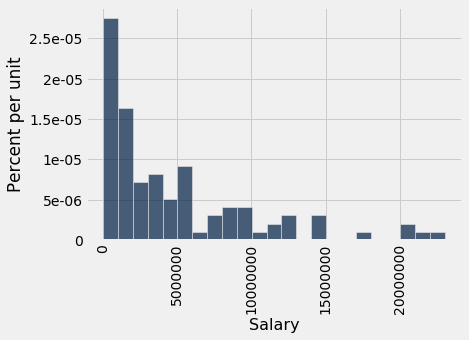

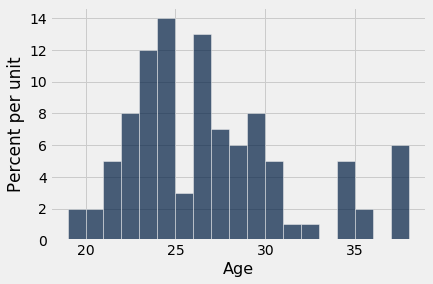

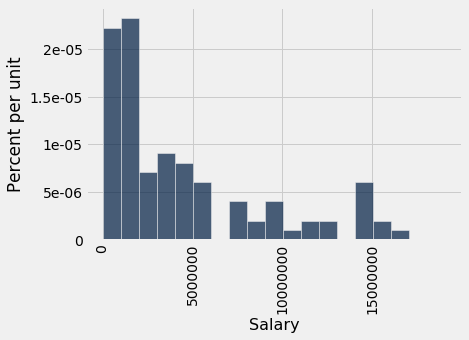

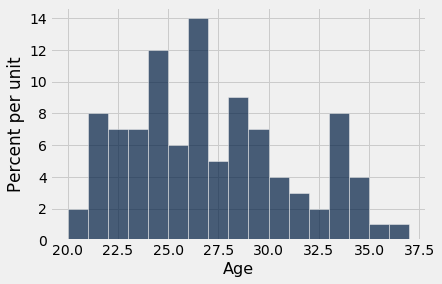

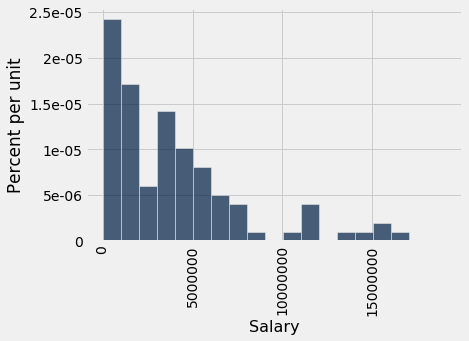

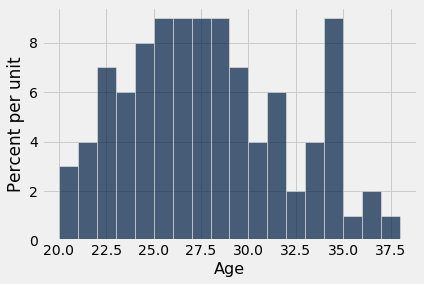

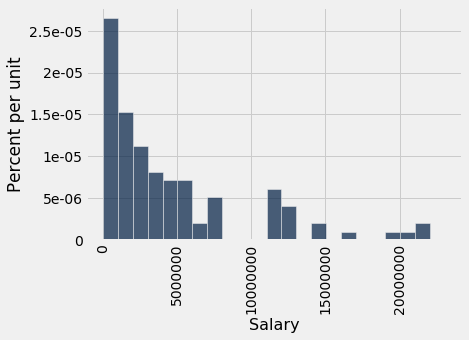

In [33]:
age_avgs = []
salary_avgs = []
for i in range(50):
    my_large_srswor_data = full_data.sample(k = 100)
    my_large_stats = compute_statistics(my_large_srswor_data)
    age_avgs.append(my_large_stats[0])
    salary_avgs.append(my_large_stats[1])
print('Spread of ages: ',(max(age_avgs)-min(age_avgs)))
print('Spread of salaries ',(max(salary_avgs)-min(salary_avgs)))

There both changing alot but at least with large sizes the changes seem to be more centralized.
sample averages are closer to true values


Congratulations, you're done with Lab 5!  Be sure to 
- **Save and Checkpoint** from the `File` menu.
- **Halt and Close** from the `File` menu. 
- **Rename your ipynb file**, replacing LASTNAMES with your last names, or the last names of your group, separated by a hyphen,
- **Upload** your file to the course website.